In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential

from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


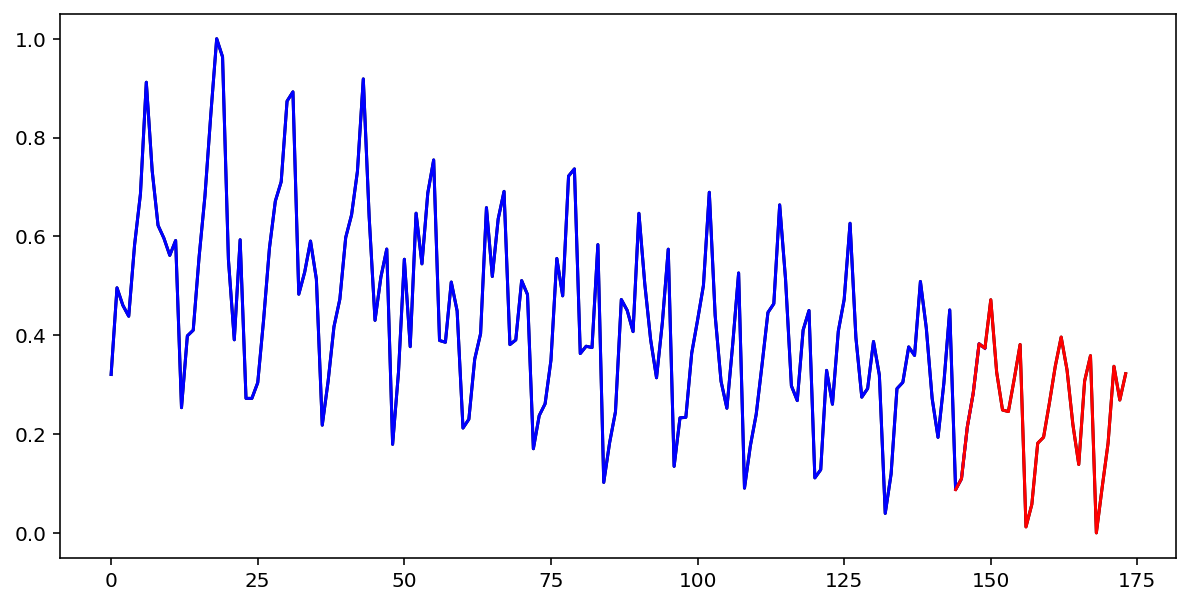

In [2]:
file = h5py.File('Fort.mat', 'r')
data = file.get('Fort')
Fort = np.array(data)
F = Fort
scaler = MinMaxScaler(feature_range=(0, 1))
F = scaler.fit_transform(F)
F_tr = F[:150]
F_test = F[144:]
plt.figure(figsize = (10, 5))
plt.plot(F, 'k')
plt.plot(np.r_[:150],F_tr, 'b')
plt.plot(np.r_[144:174],F_test, 'r')
plt.show()


In [3]:
from keras.preprocessing.sequence import TimeseriesGenerator
data_gen = TimeseriesGenerator(F_tr, F_tr,length=6, sampling_rate=1, batch_size=150)

batch_0 = data_gen[0]
x, y = batch_0 # вход и обучающий выход для сети
print(x.shape) # 144 точки обучения, прогноз 1 точки по 6 прошлым
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy=y
print(xx.shape) # меняем местами размерности
print(yy.shape) #


(144, 6, 1)
(144, 1, 6)
(144, 1)


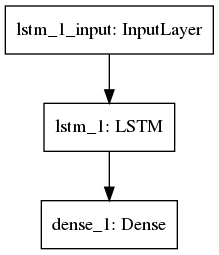

In [4]:
from keras.utils import plot_model
model = Sequential() # слои соединены последовательно
model.add(LSTM(units=20, input_shape=(1, 6))) # 20 нейронов
model.add(Dense(units = 1)) # выход одномерный
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
plot_model(model, to_file='model.png') # рисунок полученной сети


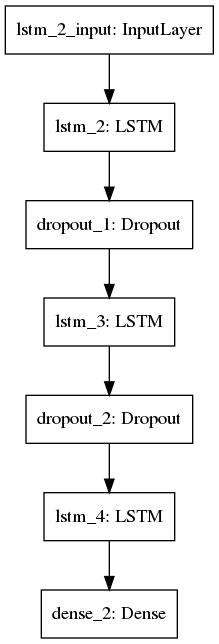

In [5]:
from keras.utils import plot_model 
model = Sequential() 
model.add(LSTM(units=20, return_sequences=True, input_shape=(1, 6))) 
model.add(Dropout(0.2)) 
model.add(LSTM(units=20, return_sequences=True)) 
model.add(Dropout(0.2)) 
model.add(LSTM(units=20)) 
model.add(Dense(units = 1)) 
model.compile(optimizer = 'adam', loss = 'mean_squared_error') 
plot_model(model, to_file='model.png') 

In [6]:
model.fit(xx, yy, epochs = 100)  # 100 эпох по 144 то

Epoch 1/100


 32/144 [=====>........................] - ETA: 19s - loss: 0.2063

128/144 [=========================>....] - ETA: 0s - loss: 0.2257 

144/144 [==============================] - 6s 39ms/step - loss: 0.2266


Epoch 2/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.2101

144/144 [==============================] - 0s 1ms/step - loss: 0.2150


Epoch 3/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.1884

128/144 [=========================>....] - ETA: 0s - loss: 0.2028

144/144 [==============================] - 0s 734us/step - loss: 0.2030


Epoch 4/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.2112

 64/144 [============>.................] - ETA: 0s - loss: 0.2019

128/144 [=========================>....] - ETA: 0s - loss: 0.1945

144/144 [==============================] - 0s 1ms/step - loss: 0.1900


Epoch 5/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.1723

 96/144 [===================>..........] - ETA: 0s - loss: 0.1832

144/144 [==============================] - 0s 771us/step - loss: 0.1758


Epoch 6/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.1854

144/144 [==============================] - 0s 1ms/step - loss: 0.1601


Epoch 7/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.1601

144/144 [==============================] - 0s 724us/step - loss: 0.1430


Epoch 8/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.1257

 96/144 [===================>..........] - ETA: 0s - loss: 0.1246

144/144 [==============================] - 0s 770us/step - loss: 0.1235


Epoch 9/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.1151

144/144 [==============================] - 0s 766us/step - loss: 0.1038


Epoch 10/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0643

144/144 [==============================] - 0s 689us/step - loss: 0.0828


Epoch 11/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0700

144/144 [==============================] - 0s 614us/step - loss: 0.0617


Epoch 12/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0664

 64/144 [============>.................] - ETA: 0s - loss: 0.0495

144/144 [==============================] - 0s 693us/step - loss: 0.0467


Epoch 13/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0303

 64/144 [============>.................] - ETA: 0s - loss: 0.0349

144/144 [==============================] - 0s 666us/step - loss: 0.0366


Epoch 14/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0503

 96/144 [===================>..........] - ETA: 0s - loss: 0.0416

144/144 [==============================] - 0s 674us/step - loss: 0.0394


Epoch 15/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0625

 96/144 [===================>..........] - ETA: 0s - loss: 0.0516

144/144 [==============================] - 0s 705us/step - loss: 0.0432


Epoch 16/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0458

 64/144 [============>.................] - ETA: 0s - loss: 0.0391

144/144 [==============================] - 0s 653us/step - loss: 0.0402


Epoch 17/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0395

128/144 [=========================>....] - ETA: 0s - loss: 0.0384

144/144 [==============================] - 0s 639us/step - loss: 0.0371


Epoch 18/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0401

144/144 [==============================] - 0s 186us/step - loss: 0.0408


Epoch 19/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0475

144/144 [==============================] - 0s 592us/step - loss: 0.0373


Epoch 20/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0291

 64/144 [============>.................] - ETA: 0s - loss: 0.0355

144/144 [==============================] - 0s 651us/step - loss: 0.0365


Epoch 21/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0433

 96/144 [===================>..........] - ETA: 0s - loss: 0.0396

144/144 [==============================] - 0s 668us/step - loss: 0.0359


Epoch 22/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0266



 64/144 [============>.................] - ETA: 0s - loss: 0.0296

144/144 [==============================] - 0s 770us/step - loss: 0.0371


Epoch 23/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0266

 64/144 [============>.................] - ETA: 0s - loss: 0.0290

144/144 [==============================] - 0s 644us/step - loss: 0.0351


Epoch 24/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0206

 64/144 [============>.................] - ETA: 0s - loss: 0.0292

144/144 [==============================] - 0s 674us/step - loss: 0.0349


Epoch 25/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0330

144/144 [==============================] - 0s 698us/step - loss: 0.0366


Epoch 26/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0340

144/144 [==============================] - 0s 1ms/step - loss: 0.0351


Epoch 27/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0434

144/144 [==============================] - 0s 687us/step - loss: 0.0361


Epoch 28/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0374

 96/144 [===================>..........] - ETA: 0s - loss: 0.0389

128/144 [=========================>....] - ETA: 0s - loss: 0.0421

144/144 [==============================] - 0s 2ms/step - loss: 0.0404


Epoch 29/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0361

 96/144 [===================>..........] - ETA: 0s - loss: 0.0367

144/144 [==============================] - 0s 977us/step - loss: 0.0358


Epoch 30/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0304

144/144 [==============================] - 0s 573us/step - loss: 0.0361


Epoch 31/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0314

144/144 [==============================] - 0s 660us/step - loss: 0.0350


Epoch 32/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0312

 64/144 [============>.................] - ETA: 0s - loss: 0.0278

144/144 [==============================] - 0s 751us/step - loss: 0.0342


Epoch 33/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0201

144/144 [==============================] - 0s 579us/step - loss: 0.0328


Epoch 34/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0408

 96/144 [===================>..........] - ETA: 0s - loss: 0.0338

144/144 [==============================] - 0s 635us/step - loss: 0.0335


Epoch 35/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0445

 96/144 [===================>..........] - ETA: 0s - loss: 0.0330

144/144 [==============================] - 0s 683us/step - loss: 0.0357


Epoch 36/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0288

128/144 [=========================>....] - ETA: 0s - loss: 0.0305

144/144 [==============================] - 0s 656us/step - loss: 0.0335


Epoch 37/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0222

128/144 [=========================>....] - ETA: 0s - loss: 0.0330

144/144 [==============================] - 0s 698us/step - loss: 0.0318


Epoch 38/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0322

 64/144 [============>.................] - ETA: 0s - loss: 0.0340

144/144 [==============================] - 0s 759us/step - loss: 0.0323


Epoch 39/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0483

 64/144 [============>.................] - ETA: 0s - loss: 0.0324

144/144 [==============================] - 0s 658us/step - loss: 0.0330


Epoch 40/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0361

 96/144 [===================>..........] - ETA: 0s - loss: 0.0337

144/144 [==============================] - 0s 618us/step - loss: 0.0307


Epoch 41/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0387

128/144 [=========================>....] - ETA: 0s - loss: 0.0310

144/144 [==============================] - 0s 667us/step - loss: 0.0317


Epoch 42/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0298

128/144 [=========================>....] - ETA: 0s - loss: 0.0350

144/144 [==============================] - 0s 655us/step - loss: 0.0330


Epoch 43/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0313

144/144 [==============================] - 0s 648us/step - loss: 0.0299


Epoch 44/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0317

144/144 [==============================] - 0s 173us/step - loss: 0.0304


Epoch 45/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0266

 96/144 [===================>..........] - ETA: 0s - loss: 0.0312

144/144 [==============================] - 0s 636us/step - loss: 0.0317


Epoch 46/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0342

 96/144 [===================>..........] - ETA: 0s - loss: 0.0263

144/144 [==============================] - 0s 713us/step - loss: 0.0307


Epoch 47/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0274

 64/144 [============>.................] - ETA: 0s - loss: 0.0276

144/144 [==============================] - 0s 710us/step - loss: 0.0314


Epoch 48/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0318

 96/144 [===================>..........] - ETA: 0s - loss: 0.0297

144/144 [==============================] - 0s 597us/step - loss: 0.0307


Epoch 49/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0261

144/144 [==============================] - 0s 577us/step - loss: 0.0305


Epoch 50/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0265

144/144 [==============================] - 0s 165us/step - loss: 0.0282


Epoch 51/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0287

 96/144 [===================>..........] - ETA: 0s - loss: 0.0309

144/144 [==============================] - 0s 617us/step - loss: 0.0299


Epoch 52/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0215

144/144 [==============================] - 0s 582us/step - loss: 0.0257


Epoch 53/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0234

144/144 [==============================] - 0s 180us/step - loss: 0.0273


Epoch 54/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0353

 64/144 [============>.................] - ETA: 0s - loss: 0.0314

144/144 [==============================] - 0s 606us/step - loss: 0.0283


Epoch 55/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0241

144/144 [==============================] - 0s 627us/step - loss: 0.0280


Epoch 56/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0335

144/144 [==============================] - 0s 163us/step - loss: 0.0250


Epoch 57/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0250

 96/144 [===================>..........] - ETA: 0s - loss: 0.0284

144/144 [==============================] - 0s 537us/step - loss: 0.0288


Epoch 58/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0399

144/144 [==============================] - 0s 218us/step - loss: 0.0287


Epoch 59/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0239

144/144 [==============================] - 0s 681us/step - loss: 0.0274


Epoch 60/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0362

144/144 [==============================] - 0s 426us/step - loss: 0.0276


Epoch 61/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0259

144/144 [==============================] - 0s 226us/step - loss: 0.0266


Epoch 62/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0282

144/144 [==============================] - 0s 498us/step - loss: 0.0260


Epoch 63/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0323

 96/144 [===================>..........] - ETA: 0s - loss: 0.0268

144/144 [==============================] - 0s 628us/step - loss: 0.0269


Epoch 64/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0175

144/144 [==============================] - 0s 581us/step - loss: 0.0257


Epoch 65/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0255

144/144 [==============================] - 0s 244us/step - loss: 0.0259


Epoch 66/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0339

 96/144 [===================>..........] - ETA: 0s - loss: 0.0284

144/144 [==============================] - 0s 551us/step - loss: 0.0277


Epoch 67/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0233

144/144 [==============================] - 0s 210us/step - loss: 0.0228


Epoch 68/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0296

144/144 [==============================] - 0s 499us/step - loss: 0.0274


Epoch 69/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0210

128/144 [=========================>....] - ETA: 0s - loss: 0.0256

144/144 [==============================] - 0s 589us/step - loss: 0.0257


Epoch 70/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0214

144/144 [==============================] - 0s 190us/step - loss: 0.0244


Epoch 71/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0298

144/144 [==============================] - 0s 566us/step - loss: 0.0264


Epoch 72/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0214

128/144 [=========================>....] - ETA: 0s - loss: 0.0267

144/144 [==============================] - 0s 596us/step - loss: 0.0272


Epoch 73/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0172

144/144 [==============================] - 0s 209us/step - loss: 0.0255


Epoch 74/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0359

144/144 [==============================] - 0s 554us/step - loss: 0.0257


Epoch 75/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0260

128/144 [=========================>....] - ETA: 0s - loss: 0.0261

144/144 [==============================] - 0s 574us/step - loss: 0.0267


Epoch 76/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0289

144/144 [==============================] - 0s 235us/step - loss: 0.0233


Epoch 77/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0327

144/144 [==============================] - 0s 574us/step - loss: 0.0263


Epoch 78/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0230

 64/144 [============>.................] - ETA: 0s - loss: 0.0268

144/144 [==============================] - 0s 617us/step - loss: 0.0264


Epoch 79/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0239

128/144 [=========================>....] - ETA: 0s - loss: 0.0245

144/144 [==============================] - 0s 616us/step - loss: 0.0243


Epoch 80/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0254

144/144 [==============================] - 0s 182us/step - loss: 0.0264


Epoch 81/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0230

144/144 [==============================] - 0s 588us/step - loss: 0.0234


Epoch 82/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0213

128/144 [=========================>....] - ETA: 0s - loss: 0.0255

144/144 [==============================] - 0s 613us/step - loss: 0.0251


Epoch 83/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0319

144/144 [==============================] - 0s 179us/step - loss: 0.0269


Epoch 84/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0280

144/144 [==============================] - 0s 586us/step - loss: 0.0242


Epoch 85/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0191

 96/144 [===================>..........] - ETA: 0s - loss: 0.0232

144/144 [==============================] - 0s 589us/step - loss: 0.0250


Epoch 86/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0262

144/144 [==============================] - 0s 173us/step - loss: 0.0241


Epoch 87/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0345

144/144 [==============================] - 0s 612us/step - loss: 0.0261


Epoch 88/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0243

 96/144 [===================>..........] - ETA: 0s - loss: 0.0249

144/144 [==============================] - 0s 596us/step - loss: 0.0256


Epoch 89/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0282

144/144 [==============================] - 0s 592us/step - loss: 0.0260


Epoch 90/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0213

144/144 [==============================] - 0s 185us/step - loss: 0.0244


Epoch 91/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0166

 64/144 [============>.................] - ETA: 0s - loss: 0.0280

144/144 [==============================] - 0s 620us/step - loss: 0.0270


Epoch 92/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0198

144/144 [==============================] - 0s 209us/step - loss: 0.0257


Epoch 93/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0301

144/144 [==============================] - 0s 595us/step - loss: 0.0260


Epoch 94/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0181

 96/144 [===================>..........] - ETA: 0s - loss: 0.0227

144/144 [==============================] - 0s 508us/step - loss: 0.0224


Epoch 95/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0269

144/144 [==============================] - 0s 170us/step - loss: 0.0260


Epoch 96/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0251

144/144 [==============================] - 0s 593us/step - loss: 0.0245


Epoch 97/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0241

128/144 [=========================>....] - ETA: 0s - loss: 0.0246

144/144 [==============================] - 0s 610us/step - loss: 0.0235


Epoch 98/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0278

144/144 [==============================] - 0s 182us/step - loss: 0.0252


Epoch 99/100
 32/144 [=====>........................] - ETA: 0s - loss: 0.0250

144/144 [==============================] - 0s 547us/step - loss: 0.0244


Epoch 100/100


 32/144 [=====>........................] - ETA: 0s - loss: 0.0189

 64/144 [============>.................] - ETA: 0s - loss: 0.0235

144/144 [==============================] - 0s 655us/step - loss: 0.0241


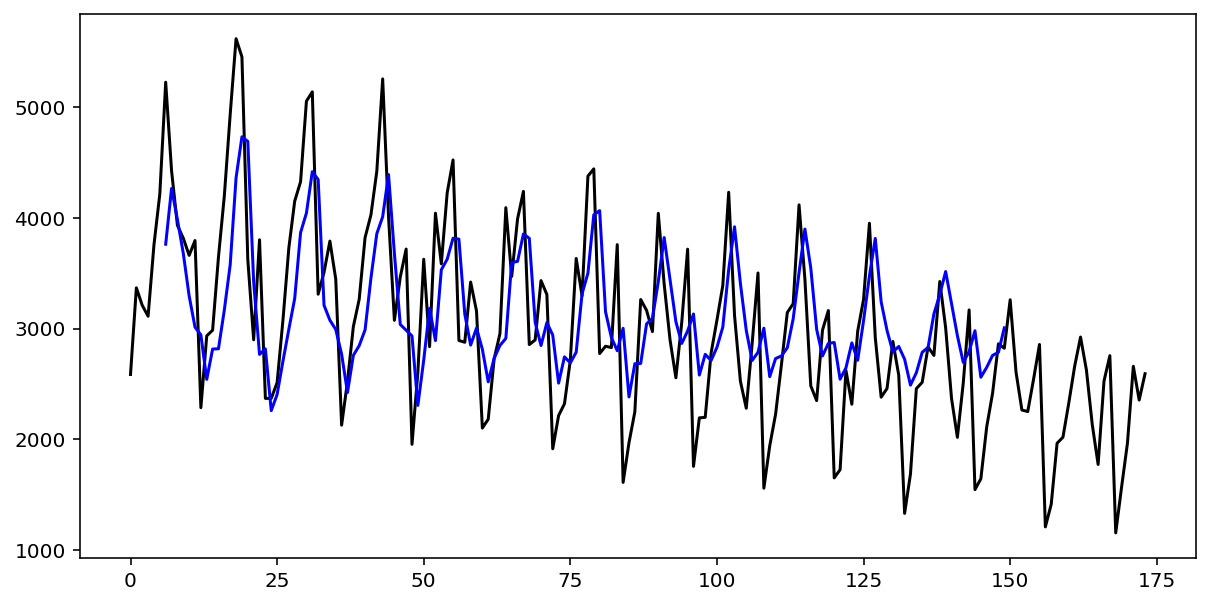

In [7]:
trainPredict = model.predict(xx) 
trainPredict = scaler.inverse_transform(trainPredict) 
plt.figure(figsize = (10, 5)) 
plt.plot(Fort, 'k') 
plt.plot(np.r_[6:150],trainPredict, 'b') 
plt.show() 

In [8]:
data_gen = TimeseriesGenerator(F_test, F_test, length=6, sampling_rate=1, batch_size=150) 
batch_0 = data_gen[0] 
x, y = batch_0 
xx=np.reshape(x, (x.shape[0], 1, x.shape[1])) 
yy = y 
print(xx.shape)   # прогноз на 24 точки по 6 наблюдениям 
print(yy.shape)   # 

(24, 1, 6)
(24, 1)


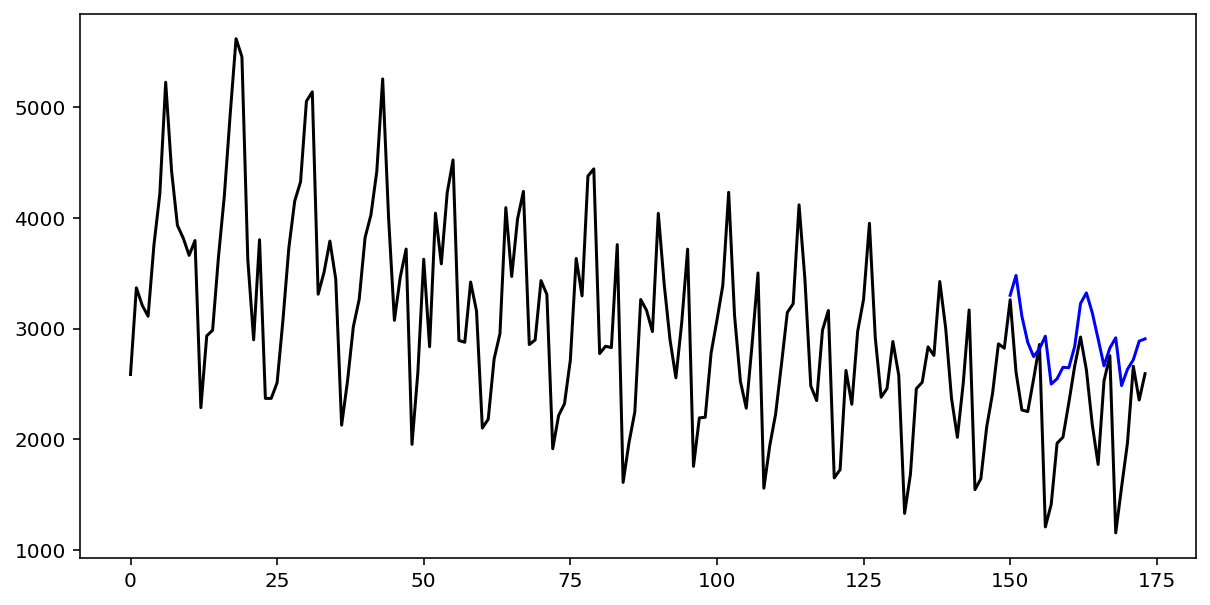

In [9]:
testPredict = model.predict(xx) 
testPredict = scaler.inverse_transform(testPredict) 
plt.figure(figsize = (10, 5)) 
plt.plot(Fort, 'k') 
plt.plot(np.r_[150:174],testPredict, 'b') 
plt.show() 

In [10]:
#10

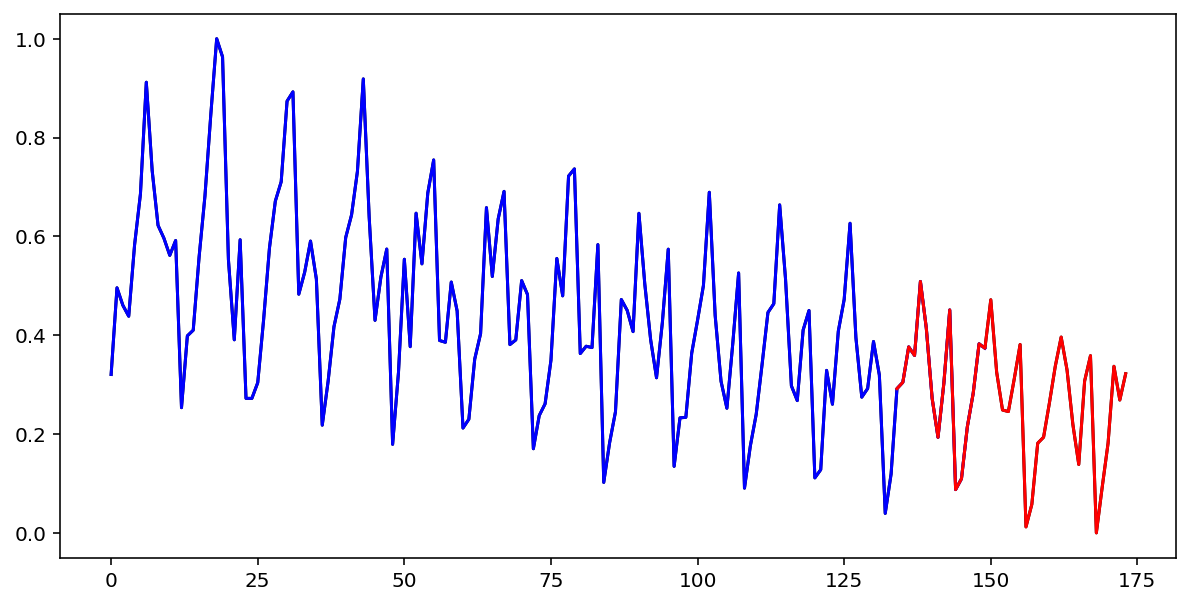

In [11]:
file = h5py.File('Fort.mat', 'r')
data = file.get('Fort')
Fort = np.array(data)
F = Fort
scaler = MinMaxScaler(feature_range=(0, 1))
F = scaler.fit_transform(F)
F_tr = F[:150]
F_test = F[134:]
plt.figure(figsize = (10, 5))
plt.plot(F, 'k')
plt.plot(np.r_[:150],F_tr, 'b')
plt.plot(np.r_[134:174],F_test, 'r')
plt.show()

In [12]:
from keras.preprocessing.sequence import TimeseriesGenerator
data_gen = TimeseriesGenerator(F_tr, F_tr,length=16, sampling_rate=1, batch_size=150)
batch_0 = data_gen[0]
x, y = batch_0 # вход и обучающий выход для сети
print(x.shape) # 
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy=y
print(xx.shape) # меняем местами размерности
print(yy.shape) #

(134, 16, 1)
(134, 1, 16)
(134, 1)


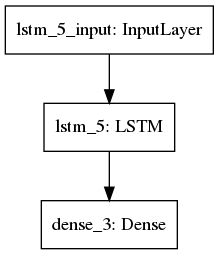

In [13]:
from keras.utils import plot_model
model = Sequential() # слои соединены последовательно
model.add(LSTM(units=40, input_shape=(1, 16))) 
model.add(Dense(units = 1)) # выход одномерный
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
plot_model(model, to_file='model.png') # рисунок полученной сети


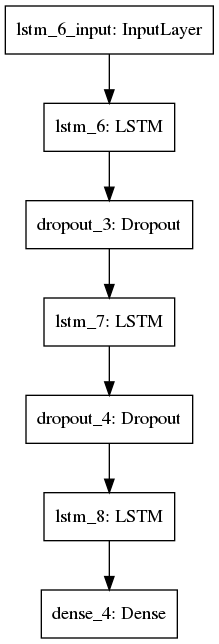

In [14]:
from keras.utils import plot_model 
model = Sequential() 
model.add(LSTM(units=40, return_sequences=True, input_shape=(1, 16))) 
model.add(Dropout(0.4)) 
model.add(LSTM(units=40, return_sequences=True)) 
model.add(Dropout(0.4)) 
model.add(LSTM(units=40)) 
model.add(Dense(units = 1)) 
model.compile(optimizer = 'adam', loss = 'mean_squared_error') 
plot_model(model, to_file='model.png') 

In [15]:
model.fit(xx, yy, epochs = 200)  # 200 эпох 

Epoch 1/200


 32/134 [======>.......................] - ETA: 9s - loss: 0.2796

128/134 [===========================>..] - ETA: 0s - loss: 0.2224

134/134 [==============================] - 3s 23ms/step - loss: 0.2191


Epoch 2/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.2473

128/134 [===========================>..] - ETA: 0s - loss: 0.2010

134/134 [==============================] - 0s 734us/step - loss: 0.2006


Epoch 3/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.1980

 96/134 [====================>.........] - ETA: 0s - loss: 0.1776

134/134 [==============================] - 0s 658us/step - loss: 0.1797


Epoch 4/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.1342

128/134 [===========================>..] - ETA: 0s - loss: 0.1442

134/134 [==============================] - 0s 776us/step - loss: 0.1544


Epoch 5/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.1689

 96/134 [====================>.........] - ETA: 0s - loss: 0.1464

134/134 [==============================] - 0s 710us/step - loss: 0.1261


Epoch 6/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.1031

 96/134 [====================>.........] - ETA: 0s - loss: 0.0991

134/134 [==============================] - 0s 751us/step - loss: 0.0936


Epoch 7/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0516

128/134 [===========================>..] - ETA: 0s - loss: 0.0582

134/134 [==============================] - 0s 715us/step - loss: 0.0565


Epoch 8/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0448

 64/134 [=============>................] - ETA: 0s - loss: 0.0473

134/134 [==============================] - 0s 761us/step - loss: 0.0424


Epoch 9/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0308

 64/134 [=============>................] - ETA: 0s - loss: 0.0354

134/134 [==============================] - 0s 720us/step - loss: 0.0389


Epoch 10/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0332

 96/134 [====================>.........] - ETA: 0s - loss: 0.0402

134/134 [==============================] - 0s 896us/step - loss: 0.0413


Epoch 11/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0314

128/134 [===========================>..] - ETA: 0s - loss: 0.0337

134/134 [==============================] - 0s 759us/step - loss: 0.0341


Epoch 12/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0321

128/134 [===========================>..] - ETA: 0s - loss: 0.0348

134/134 [==============================] - 0s 695us/step - loss: 0.0341


Epoch 13/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0304

 96/134 [====================>.........] - ETA: 0s - loss: 0.0400

134/134 [==============================] - 0s 592us/step - loss: 0.0366


Epoch 14/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0243

 96/134 [====================>.........] - ETA: 0s - loss: 0.0316

134/134 [==============================] - 0s 818us/step - loss: 0.0338


Epoch 15/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0345

128/134 [===========================>..] - ETA: 0s - loss: 0.0292

134/134 [==============================] - 0s 923us/step - loss: 0.0307


Epoch 16/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0231

128/134 [===========================>..] - ETA: 0s - loss: 0.0287

134/134 [==============================] - 0s 560us/step - loss: 0.0288


Epoch 17/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0370

 64/134 [=============>................] - ETA: 0s - loss: 0.0319

134/134 [==============================] - 0s 741us/step - loss: 0.0324


Epoch 18/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0267

 96/134 [====================>.........] - ETA: 0s - loss: 0.0312

134/134 [==============================] - 0s 588us/step - loss: 0.0329


Epoch 19/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0209

 96/134 [====================>.........] - ETA: 0s - loss: 0.0284

134/134 [==============================] - 0s 690us/step - loss: 0.0279


Epoch 20/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0289

128/134 [===========================>..] - ETA: 0s - loss: 0.0274

134/134 [==============================] - 0s 676us/step - loss: 0.0273


Epoch 21/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0278

134/134 [==============================] - 0s 668us/step - loss: 0.0266


Epoch 22/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0299

 96/134 [====================>.........] - ETA: 0s - loss: 0.0327

134/134 [==============================] - 0s 851us/step - loss: 0.0296


Epoch 23/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0214

 96/134 [====================>.........] - ETA: 0s - loss: 0.0261

134/134 [==============================] - 0s 742us/step - loss: 0.0270


Epoch 24/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0208

 96/134 [====================>.........] - ETA: 0s - loss: 0.0261

134/134 [==============================] - 0s 760us/step - loss: 0.0251


Epoch 25/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0315

 96/134 [====================>.........] - ETA: 0s - loss: 0.0242

134/134 [==============================] - 0s 709us/step - loss: 0.0255


Epoch 26/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0245

 96/134 [====================>.........] - ETA: 0s - loss: 0.0217

134/134 [==============================] - 0s 909us/step - loss: 0.0249


Epoch 27/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0184

 96/134 [====================>.........] - ETA: 0s - loss: 0.0218

134/134 [==============================] - 0s 637us/step - loss: 0.0209


Epoch 28/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0189

134/134 [==============================] - 0s 678us/step - loss: 0.0196


Epoch 29/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0354

 64/134 [=============>................] - ETA: 0s - loss: 0.0288

134/134 [==============================] - 0s 743us/step - loss: 0.0257


Epoch 30/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0273

134/134 [==============================] - 0s 721us/step - loss: 0.0241


Epoch 31/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0262

134/134 [==============================] - 0s 730us/step - loss: 0.0211


Epoch 32/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0234

 64/134 [=============>................] - ETA: 0s - loss: 0.0184

134/134 [==============================] - 0s 697us/step - loss: 0.0181


Epoch 33/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0185

 64/134 [=============>................] - ETA: 0s - loss: 0.0222

134/134 [==============================] - 0s 868us/step - loss: 0.0185


Epoch 34/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0149

128/134 [===========================>..] - ETA: 0s - loss: 0.0183

134/134 [==============================] - 0s 1ms/step - loss: 0.0185


Epoch 35/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0231

128/134 [===========================>..] - ETA: 0s - loss: 0.0191

134/134 [==============================] - 0s 938us/step - loss: 0.0195


Epoch 36/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0118

 64/134 [=============>................] - ETA: 0s - loss: 0.0154

134/134 [==============================] - 0s 665us/step - loss: 0.0172


Epoch 37/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0192

 64/134 [=============>................] - ETA: 0s - loss: 0.0158

134/134 [==============================] - 0s 716us/step - loss: 0.0161


Epoch 38/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0135

 64/134 [=============>................] - ETA: 0s - loss: 0.0136

134/134 [==============================] - 0s 1ms/step - loss: 0.0159


Epoch 39/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0204

134/134 [==============================] - 0s 267us/step - loss: 0.0172


Epoch 40/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0153

134/134 [==============================] - 0s 693us/step - loss: 0.0171


Epoch 41/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0145

 64/134 [=============>................] - ETA: 0s - loss: 0.0134

134/134 [==============================] - 0s 667us/step - loss: 0.0153


Epoch 42/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0139

134/134 [==============================] - 0s 647us/step - loss: 0.0173


Epoch 43/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0310

134/134 [==============================] - 0s 309us/step - loss: 0.0202


Epoch 44/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0126

134/134 [==============================] - 0s 567us/step - loss: 0.0148


Epoch 45/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0135

 96/134 [====================>.........] - ETA: 0s - loss: 0.0178

134/134 [==============================] - 0s 635us/step - loss: 0.0165


Epoch 46/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0092

134/134 [==============================] - 0s 610us/step - loss: 0.0160


Epoch 47/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0182

134/134 [==============================] - 0s 227us/step - loss: 0.0159


Epoch 48/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0126

 64/134 [=============>................] - ETA: 0s - loss: 0.0140

134/134 [==============================] - 0s 637us/step - loss: 0.0148


Epoch 49/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0180

128/134 [===========================>..] - ETA: 0s - loss: 0.0164

134/134 [==============================] - 0s 645us/step - loss: 0.0165


Epoch 50/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0111

134/134 [==============================] - 0s 217us/step - loss: 0.0152


Epoch 51/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0144

134/134 [==============================] - 0s 710us/step - loss: 0.0150


Epoch 52/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0184

128/134 [===========================>..] - ETA: 0s - loss: 0.0147

134/134 [==============================] - 0s 550us/step - loss: 0.0150


Epoch 53/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0169

134/134 [==============================] - 0s 235us/step - loss: 0.0142


Epoch 54/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0126

134/134 [==============================] - 0s 678us/step - loss: 0.0139


Epoch 55/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0099

 96/134 [====================>.........] - ETA: 0s - loss: 0.0128

134/134 [==============================] - 0s 785us/step - loss: 0.0146


Epoch 56/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0107

134/134 [==============================] - 0s 471us/step - loss: 0.0153


Epoch 57/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0148

134/134 [==============================] - 0s 289us/step - loss: 0.0157


Epoch 58/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0150

 96/134 [====================>.........] - ETA: 0s - loss: 0.0143

134/134 [==============================] - 0s 607us/step - loss: 0.0161


Epoch 59/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0185

128/134 [===========================>..] - ETA: 0s - loss: 0.0170

134/134 [==============================] - 0s 649us/step - loss: 0.0166


Epoch 60/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0125

134/134 [==============================] - 0s 214us/step - loss: 0.0144


Epoch 61/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0164

134/134 [==============================] - 0s 573us/step - loss: 0.0152


Epoch 62/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0124

 96/134 [====================>.........] - ETA: 0s - loss: 0.0154

134/134 [==============================] - 0s 727us/step - loss: 0.0156


Epoch 63/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0087

134/134 [==============================] - 0s 555us/step - loss: 0.0121


Epoch 64/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0139

134/134 [==============================] - 0s 203us/step - loss: 0.0142


Epoch 65/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0127

 64/134 [=============>................] - ETA: 0s - loss: 0.0144

134/134 [==============================] - 0s 641us/step - loss: 0.0149


Epoch 66/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0158

 96/134 [====================>.........] - ETA: 0s - loss: 0.0149

134/134 [==============================] - 0s 689us/step - loss: 0.0163


Epoch 67/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0113

134/134 [==============================] - 0s 629us/step - loss: 0.0130


Epoch 68/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0205

134/134 [==============================] - 0s 272us/step - loss: 0.0154


Epoch 69/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0095

 96/134 [====================>.........] - ETA: 0s - loss: 0.0122

134/134 [==============================] - 0s 557us/step - loss: 0.0134


Epoch 70/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0092

134/134 [==============================] - 0s 654us/step - loss: 0.0129


Epoch 71/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0127

134/134 [==============================] - 0s 224us/step - loss: 0.0152


Epoch 72/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0111

 64/134 [=============>................] - ETA: 0s - loss: 0.0146

134/134 [==============================] - 0s 682us/step - loss: 0.0140


Epoch 73/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0171

 96/134 [====================>.........] - ETA: 0s - loss: 0.0157

134/134 [==============================] - 0s 652us/step - loss: 0.0153


Epoch 74/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0195

134/134 [==============================] - 0s 209us/step - loss: 0.0142


Epoch 75/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0214

134/134 [==============================] - 0s 573us/step - loss: 0.0163


Epoch 76/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0137

 96/134 [====================>.........] - ETA: 0s - loss: 0.0138

134/134 [==============================] - 0s 637us/step - loss: 0.0130


Epoch 77/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0182

134/134 [==============================] - 0s 204us/step - loss: 0.0120


Epoch 78/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0247

134/134 [==============================] - 0s 622us/step - loss: 0.0141


Epoch 79/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0116

 64/134 [=============>................] - ETA: 0s - loss: 0.0137

134/134 [==============================] - 0s 664us/step - loss: 0.0154


Epoch 80/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0145

128/134 [===========================>..] - ETA: 0s - loss: 0.0125

134/134 [==============================] - 0s 701us/step - loss: 0.0125


Epoch 81/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0115

134/134 [==============================] - 0s 207us/step - loss: 0.0113


Epoch 82/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0151

 64/134 [=============>................] - ETA: 0s - loss: 0.0130

134/134 [==============================] - 0s 566us/step - loss: 0.0138


Epoch 83/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0146

134/134 [==============================] - 0s 643us/step - loss: 0.0126


Epoch 84/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0076

134/134 [==============================] - 0s 197us/step - loss: 0.0120


Epoch 85/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0175

 64/134 [=============>................] - ETA: 0s - loss: 0.0153

134/134 [==============================] - 0s 620us/step - loss: 0.0135


Epoch 86/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0131

134/134 [==============================] - 0s 633us/step - loss: 0.0115


Epoch 87/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0141

134/134 [==============================] - 0s 247us/step - loss: 0.0130


Epoch 88/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0095

134/134 [==============================] - 0s 322us/step - loss: 0.0094


Epoch 89/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0126

 64/134 [=============>................] - ETA: 0s - loss: 0.0106

134/134 [==============================] - 0s 749us/step - loss: 0.0132


Epoch 90/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0184

134/134 [==============================] - 0s 470us/step - loss: 0.0146


Epoch 91/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0094

134/134 [==============================] - 0s 374us/step - loss: 0.0127


Epoch 92/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0121

134/134 [==============================] - 0s 381us/step - loss: 0.0139


Epoch 93/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0092

128/134 [===========================>..] - ETA: 0s - loss: 0.0120

134/134 [==============================] - 0s 615us/step - loss: 0.0118


Epoch 94/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0118

134/134 [==============================] - 0s 220us/step - loss: 0.0141


Epoch 95/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0110

134/134 [==============================] - 0s 634us/step - loss: 0.0117


Epoch 96/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0103

 96/134 [====================>.........] - ETA: 0s - loss: 0.0097

134/134 [==============================] - 0s 619us/step - loss: 0.0113


Epoch 97/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0094

134/134 [==============================] - 0s 211us/step - loss: 0.0123


Epoch 98/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0100

134/134 [==============================] - 0s 241us/step - loss: 0.0125


Epoch 99/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0115

 64/134 [=============>................] - ETA: 0s - loss: 0.0123

134/134 [==============================] - 0s 795us/step - loss: 0.0129


Epoch 100/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0098

 96/134 [====================>.........] - ETA: 0s - loss: 0.0118

134/134 [==============================] - 0s 609us/step - loss: 0.0115


Epoch 101/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0114

128/134 [===========================>..] - ETA: 0s - loss: 0.0103

134/134 [==============================] - 0s 680us/step - loss: 0.0101


Epoch 102/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0191

128/134 [===========================>..] - ETA: 0s - loss: 0.0130

134/134 [==============================] - 0s 706us/step - loss: 0.0128


Epoch 103/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0088

134/134 [==============================] - 0s 294us/step - loss: 0.0125


Epoch 104/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0109

134/134 [==============================] - 0s 655us/step - loss: 0.0125


Epoch 105/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0106

 96/134 [====================>.........] - ETA: 0s - loss: 0.0105

134/134 [==============================] - 0s 579us/step - loss: 0.0107


Epoch 106/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0115



 96/134 [====================>.........] - ETA: 0s - loss: 0.0136

134/134 [==============================] - 0s 702us/step - loss: 0.0123


Epoch 107/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0097

134/134 [==============================] - 0s 233us/step - loss: 0.0117


Epoch 108/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0103

134/134 [==============================] - 0s 554us/step - loss: 0.0132


Epoch 109/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0106

 64/134 [=============>................] - ETA: 0s - loss: 0.0102

134/134 [==============================] - 0s 719us/step - loss: 0.0116


Epoch 110/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0095

 96/134 [====================>.........] - ETA: 0s - loss: 0.0100

134/134 [==============================] - 0s 657us/step - loss: 0.0109


Epoch 111/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0091

134/134 [==============================] - 0s 621us/step - loss: 0.0119


Epoch 112/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0160

134/134 [==============================] - 0s 252us/step - loss: 0.0103


Epoch 113/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0092

 64/134 [=============>................] - ETA: 0s - loss: 0.0104

134/134 [==============================] - 0s 690us/step - loss: 0.0115


Epoch 114/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0100

 96/134 [====================>.........] - ETA: 0s - loss: 0.0103

134/134 [==============================] - 0s 687us/step - loss: 0.0117


Epoch 115/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0088

 96/134 [====================>.........] - ETA: 0s - loss: 0.0106

134/134 [==============================] - 0s 712us/step - loss: 0.0097


Epoch 116/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0141

128/134 [===========================>..] - ETA: 0s - loss: 0.0112

134/134 [==============================] - 0s 681us/step - loss: 0.0110


Epoch 117/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0142

 96/134 [====================>.........] - ETA: 0s - loss: 0.0123

134/134 [==============================] - 0s 774us/step - loss: 0.0115


Epoch 118/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0097

 96/134 [====================>.........] - ETA: 0s - loss: 0.0100

134/134 [==============================] - 0s 1ms/step - loss: 0.0110


Epoch 119/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0098

 96/134 [====================>.........] - ETA: 0s - loss: 0.0099

134/134 [==============================] - 0s 1ms/step - loss: 0.0119


Epoch 120/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0112

 64/134 [=============>................] - ETA: 0s - loss: 0.0099

134/134 [==============================] - 0s 797us/step - loss: 0.0098


Epoch 121/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0088

134/134 [==============================] - 0s 757us/step - loss: 0.0097


Epoch 122/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0087

134/134 [==============================] - 0s 1ms/step - loss: 0.0102


Epoch 123/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0098

134/134 [==============================] - 0s 366us/step - loss: 0.0103


Epoch 124/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0079

134/134 [==============================] - 0s 565us/step - loss: 0.0105


Epoch 125/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0077

 64/134 [=============>................] - ETA: 0s - loss: 0.0097

134/134 [==============================] - 0s 704us/step - loss: 0.0100


Epoch 126/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0085

134/134 [==============================] - 0s 529us/step - loss: 0.0102


Epoch 127/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0081

134/134 [==============================] - 0s 411us/step - loss: 0.0090


Epoch 128/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0106

128/134 [===========================>..] - ETA: 0s - loss: 0.0081

134/134 [==============================] - 0s 555us/step - loss: 0.0087


Epoch 129/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0069

 96/134 [====================>.........] - ETA: 0s - loss: 0.0113

134/134 [==============================] - 0s 1ms/step - loss: 0.0104


Epoch 130/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0113

134/134 [==============================] - 0s 1ms/step - loss: 0.0090


Epoch 131/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0118

 96/134 [====================>.........] - ETA: 0s - loss: 0.0113

134/134 [==============================] - 0s 1ms/step - loss: 0.0108


Epoch 132/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0112

128/134 [===========================>..] - ETA: 0s - loss: 0.0120

134/134 [==============================] - 0s 940us/step - loss: 0.0118


Epoch 133/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0144

 96/134 [====================>.........] - ETA: 0s - loss: 0.0121

134/134 [==============================] - 0s 881us/step - loss: 0.0128


Epoch 134/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0106

128/134 [===========================>..] - ETA: 0s - loss: 0.0097

134/134 [==============================] - 0s 1ms/step - loss: 0.0100


Epoch 135/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0134

134/134 [==============================] - 0s 492us/step - loss: 0.0131


Epoch 136/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0080

134/134 [==============================] - 0s 370us/step - loss: 0.0094


Epoch 137/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0090

134/134 [==============================] - 0s 295us/step - loss: 0.0098


Epoch 138/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0112

134/134 [==============================] - 0s 417us/step - loss: 0.0115


Epoch 139/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0078

134/134 [==============================] - 0s 283us/step - loss: 0.0095


Epoch 140/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0115

134/134 [==============================] - 0s 502us/step - loss: 0.0112


Epoch 141/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0095

134/134 [==============================] - 0s 470us/step - loss: 0.0085


Epoch 142/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0172

134/134 [==============================] - 0s 404us/step - loss: 0.0118


Epoch 143/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0116

134/134 [==============================] - 0s 368us/step - loss: 0.0084


Epoch 144/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0079

134/134 [==============================] - 0s 348us/step - loss: 0.0106


Epoch 145/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0067

134/134 [==============================] - 0s 406us/step - loss: 0.0106


Epoch 146/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0095

134/134 [==============================] - 0s 347us/step - loss: 0.0090


Epoch 147/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0099

134/134 [==============================] - 0s 332us/step - loss: 0.0099


Epoch 148/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0147

 96/134 [====================>.........] - ETA: 0s - loss: 0.0096

134/134 [==============================] - 0s 693us/step - loss: 0.0088


Epoch 149/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0078



134/134 [==============================] - 0s 376us/step - loss: 0.0089


Epoch 150/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0136

134/134 [==============================] - 0s 376us/step - loss: 0.0090


Epoch 151/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0078

134/134 [==============================] - 0s 470us/step - loss: 0.0109


Epoch 152/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0169

 96/134 [====================>.........] - ETA: 0s - loss: 0.0116

134/134 [==============================] - 0s 696us/step - loss: 0.0110


Epoch 153/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0074

134/134 [==============================] - 0s 256us/step - loss: 0.0086


Epoch 154/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0064

134/134 [==============================] - 0s 561us/step - loss: 0.0091


Epoch 155/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0104

 96/134 [====================>.........] - ETA: 0s - loss: 0.0087

134/134 [==============================] - 0s 631us/step - loss: 0.0083


Epoch 156/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0122

 96/134 [====================>.........] - ETA: 0s - loss: 0.0110

134/134 [==============================] - 0s 805us/step - loss: 0.0102


Epoch 157/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0112

134/134 [==============================] - 0s 593us/step - loss: 0.0099


Epoch 158/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0084

134/134 [==============================] - 0s 315us/step - loss: 0.0107


Epoch 159/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0098

134/134 [==============================] - 0s 368us/step - loss: 0.0095


Epoch 160/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0099

 96/134 [====================>.........] - ETA: 0s - loss: 0.0109

134/134 [==============================] - 0s 677us/step - loss: 0.0120


Epoch 161/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0102

128/134 [===========================>..] - ETA: 0s - loss: 0.0091

134/134 [==============================] - 0s 555us/step - loss: 0.0099


Epoch 162/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0080

128/134 [===========================>..] - ETA: 0s - loss: 0.0090

134/134 [==============================] - 0s 645us/step - loss: 0.0090


Epoch 163/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0154

134/134 [==============================] - 0s 275us/step - loss: 0.0113


Epoch 164/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0120

134/134 [==============================] - 0s 263us/step - loss: 0.0087


Epoch 165/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0092

134/134 [==============================] - 0s 625us/step - loss: 0.0099


Epoch 166/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0104

 96/134 [====================>.........] - ETA: 0s - loss: 0.0098

134/134 [==============================] - 0s 670us/step - loss: 0.0094


Epoch 167/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0084

128/134 [===========================>..] - ETA: 0s - loss: 0.0073

134/134 [==============================] - 0s 743us/step - loss: 0.0072


Epoch 168/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0060

134/134 [==============================] - 0s 388us/step - loss: 0.0101


Epoch 169/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0076

 64/134 [=============>................] - ETA: 0s - loss: 0.0096

134/134 [==============================] - 0s 913us/step - loss: 0.0093


Epoch 170/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0088

134/134 [==============================] - 0s 532us/step - loss: 0.0101


Epoch 171/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0066

134/134 [==============================] - 0s 451us/step - loss: 0.0082


Epoch 172/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0083

134/134 [==============================] - 0s 624us/step - loss: 0.0093


Epoch 173/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0086

128/134 [===========================>..] - ETA: 0s - loss: 0.0085

134/134 [==============================] - 0s 696us/step - loss: 0.0084


Epoch 174/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0084

134/134 [==============================] - 0s 797us/step - loss: 0.0087


Epoch 175/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0127

134/134 [==============================] - 0s 296us/step - loss: 0.0091


Epoch 176/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0073

 96/134 [====================>.........] - ETA: 0s - loss: 0.0079

134/134 [==============================] - 0s 704us/step - loss: 0.0083


Epoch 177/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0093

128/134 [===========================>..] - ETA: 0s - loss: 0.0097

134/134 [==============================] - 0s 641us/step - loss: 0.0094


Epoch 178/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0054

 64/134 [=============>................] - ETA: 0s - loss: 0.0080

134/134 [==============================] - 0s 765us/step - loss: 0.0099


Epoch 179/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0091

134/134 [==============================] - 0s 646us/step - loss: 0.0078


Epoch 180/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0050

 96/134 [====================>.........] - ETA: 0s - loss: 0.0083

134/134 [==============================] - 0s 643us/step - loss: 0.0089


Epoch 181/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0086

128/134 [===========================>..] - ETA: 0s - loss: 0.0080

134/134 [==============================] - 0s 702us/step - loss: 0.0077


Epoch 182/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0090

 96/134 [====================>.........] - ETA: 0s - loss: 0.0099

134/134 [==============================] - 0s 894us/step - loss: 0.0087


Epoch 183/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0063

134/134 [==============================] - 0s 420us/step - loss: 0.0088


Epoch 184/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0103

134/134 [==============================] - 0s 483us/step - loss: 0.0086


Epoch 185/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0063

134/134 [==============================] - 0s 554us/step - loss: 0.0089


Epoch 186/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0088

134/134 [==============================] - 0s 645us/step - loss: 0.0083


Epoch 187/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0061

134/134 [==============================] - 0s 659us/step - loss: 0.0089


Epoch 188/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0084

134/134 [==============================] - 0s 1ms/step - loss: 0.0088


Epoch 189/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0098

134/134 [==============================] - 0s 319us/step - loss: 0.0087


Epoch 190/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0086

134/134 [==============================] - 0s 606us/step - loss: 0.0107


Epoch 191/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0079

134/134 [==============================] - 0s 733us/step - loss: 0.0077


Epoch 192/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0073

 64/134 [=============>................] - ETA: 0s - loss: 0.0089

134/134 [==============================] - 0s 858us/step - loss: 0.0083


Epoch 193/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0082

 96/134 [====================>.........] - ETA: 0s - loss: 0.0094

134/134 [==============================] - 0s 599us/step - loss: 0.0087


Epoch 194/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0046

 96/134 [====================>.........] - ETA: 0s - loss: 0.0076

134/134 [==============================] - 0s 678us/step - loss: 0.0069


Epoch 195/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0074

 96/134 [====================>.........] - ETA: 0s - loss: 0.0078

134/134 [==============================] - 0s 790us/step - loss: 0.0083


Epoch 196/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0065

 64/134 [=============>................] - ETA: 0s - loss: 0.0085

134/134 [==============================] - 0s 904us/step - loss: 0.0097


Epoch 197/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0075

134/134 [==============================] - 0s 463us/step - loss: 0.0088


Epoch 198/200


 32/134 [======>.......................] - ETA: 0s - loss: 0.0047

 96/134 [====================>.........] - ETA: 0s - loss: 0.0081

134/134 [==============================] - 0s 682us/step - loss: 0.0081


Epoch 199/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0093

134/134 [==============================] - 0s 584us/step - loss: 0.0092


Epoch 200/200
 32/134 [======>.......................] - ETA: 0s - loss: 0.0098

134/134 [==============================] - 0s 405us/step - loss: 0.0090


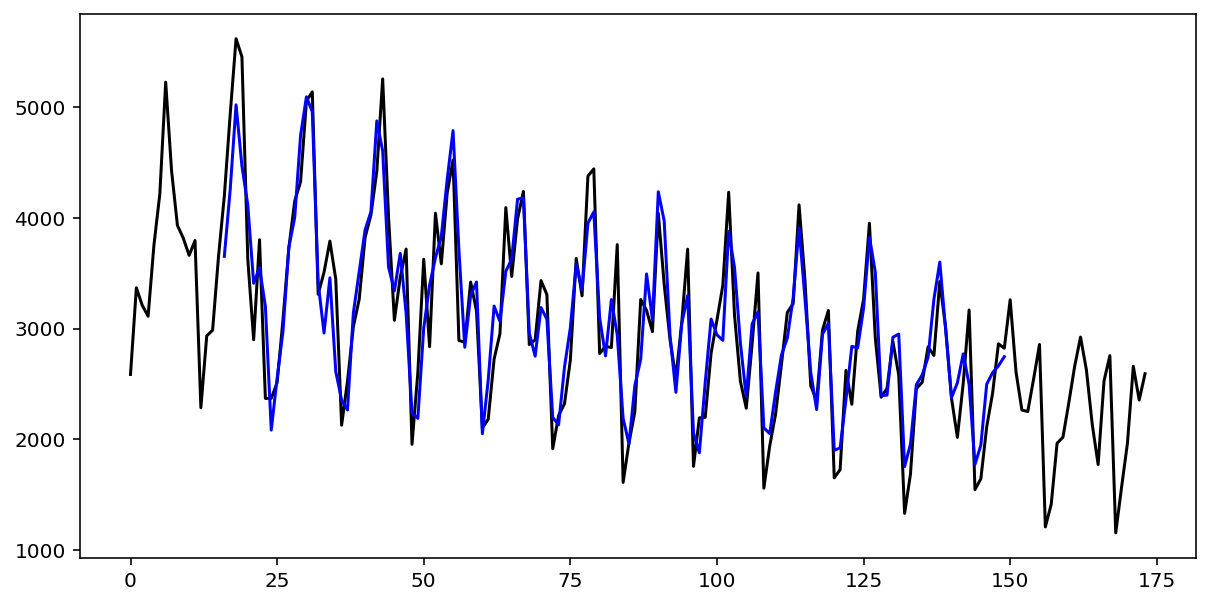

In [16]:
trainPredict = model.predict(xx) 
trainPredict = scaler.inverse_transform(trainPredict) 
plt.figure(figsize = (10, 5)) 
plt.plot(Fort, 'k') 
plt.plot(np.r_[16:150],trainPredict, 'b') 
plt.show() 

In [17]:
data_gen = TimeseriesGenerator(F_test, F_test, length=16, sampling_rate=1, batch_size=150) 
batch_0 = data_gen[0] 
x, y = batch_0 
xx=np.reshape(x, (x.shape[0], 1, x.shape[1])) 
yy = y 
print(xx.shape)   # прогноз на 24 точки 
print(yy.shape)   # 

(24, 1, 16)
(24, 1)


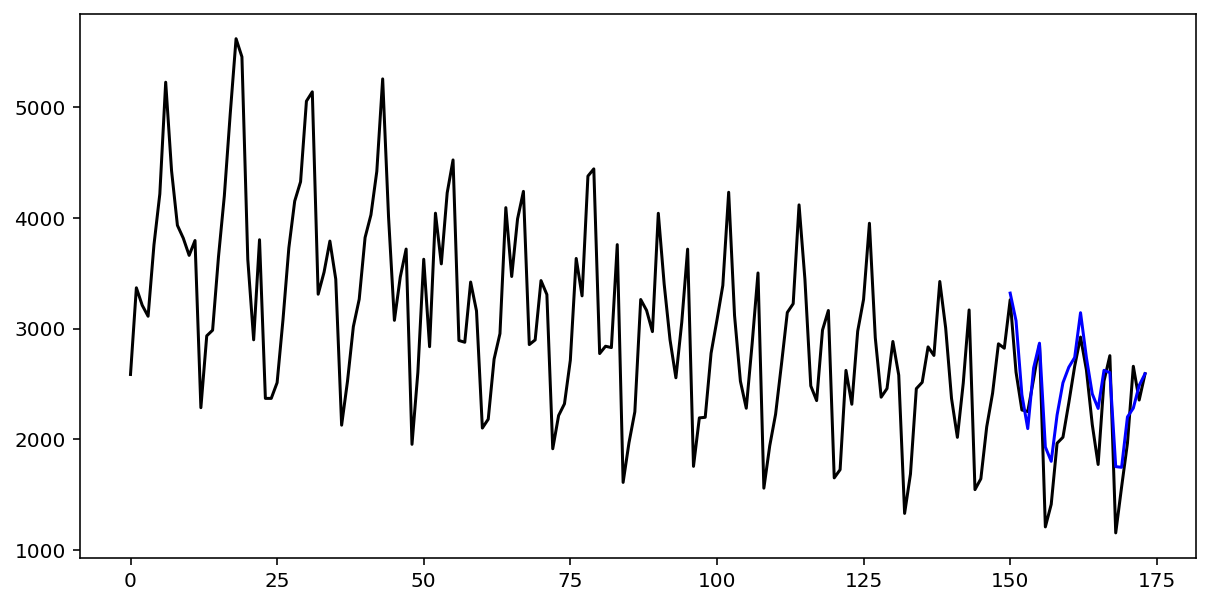

In [18]:
testPredict = model.predict(xx) 
testPredict = scaler.inverse_transform(testPredict) 
plt.figure(figsize = (10, 5)) 
plt.plot(Fort, 'k') 
plt.plot(np.r_[150:174],testPredict, 'b') 
plt.show() 

In [19]:
#11

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


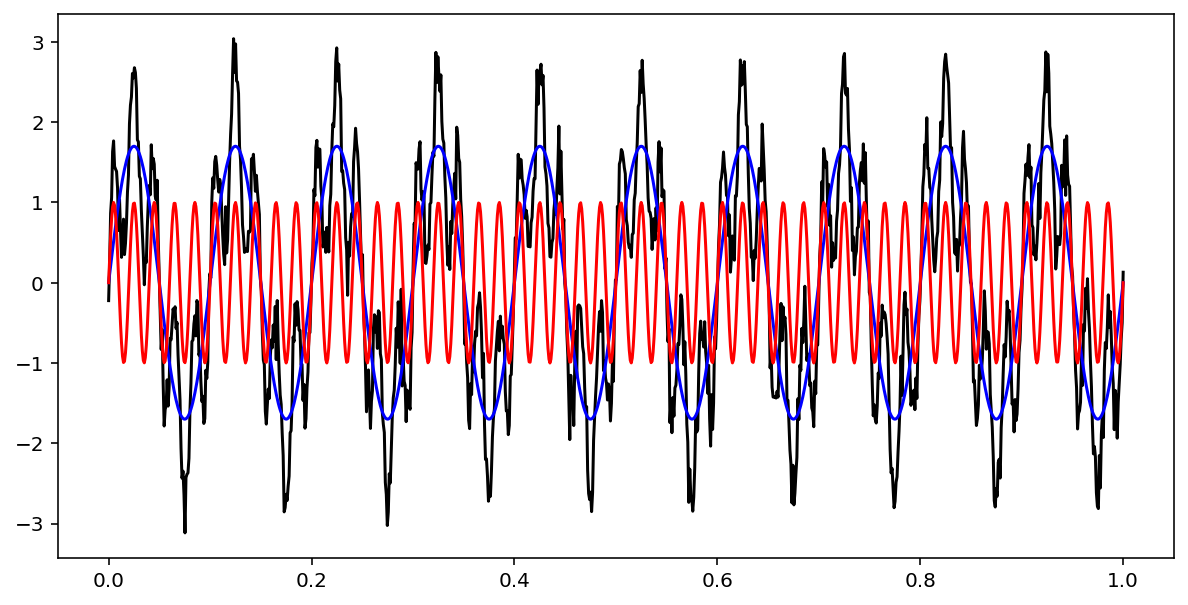

In [2]:
t = np.linspace(0, 1, 1024) 
f1 = 10 
f2 = 50 
F=1.7*np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+0.2*np.random.randn(len(t))
plt.figure(figsize = (10, 5)) 
plt.plot(t, F, 'k') 
plt.plot(t, 1.7*np.sin(2*np.pi*f1*t), 'b') 
plt.plot(t, np.sin(2*np.pi*f2*t), 'r') 
plt.show() 

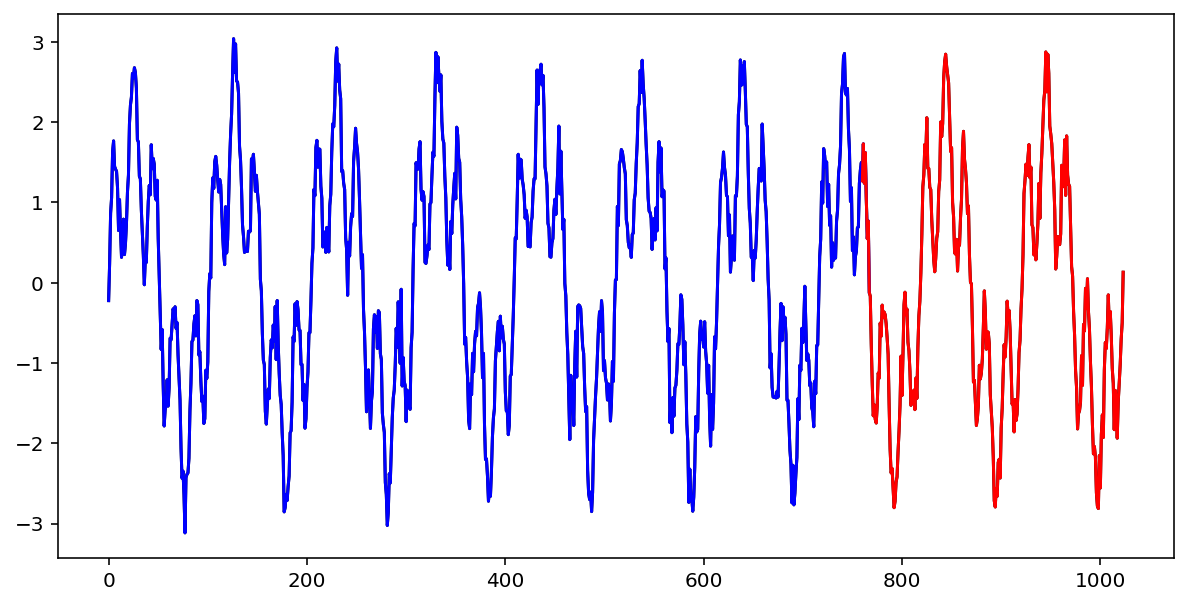

In [3]:
F_tr = F[:768] 
F_test = F[760:] 
plt.figure(figsize = (10, 5)) 
plt.plot(F, 'k') 
plt.plot(np.r_[:768],F_tr, 'b') 
plt.plot(np.r_[760:1024],F_test, 'r') 
plt.show() 

In [4]:
from keras.preprocessing.sequence import TimeseriesGenerator
data_gen = TimeseriesGenerator(F_tr, F_tr,length=8, sampling_rate=1, batch_size=768)

batch_0 = data_gen[0]
x, y = batch_0 # вход и обучающий выход для сети
print(x.shape) #
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy=y
print(xx.shape) # меняем местами размерности
print(yy.shape) #

(760, 8)
(760, 1, 8)
(760,)


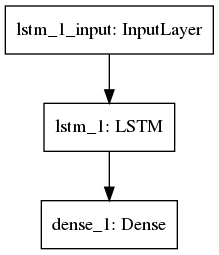

In [5]:
from keras.utils import plot_model
model = Sequential() # слои соединены последовательно
model.add(LSTM(units=30, input_shape=(1, 8))) 
model.add(Dense(units = 1)) # выход одномерный
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
plot_model(model, to_file='model.png') # рисунок полученной сети

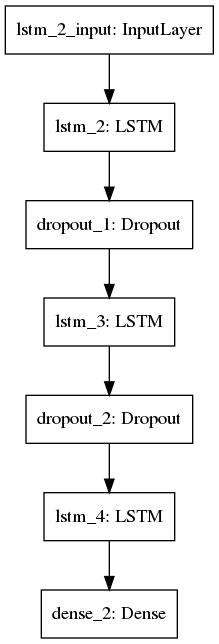

In [6]:
from keras.utils import plot_model 
model = Sequential() 
model.add(LSTM(units=30, return_sequences=True, input_shape=(1, 8))) 
model.add(Dropout(0.4)) 
model.add(LSTM(units=30, return_sequences=True)) 
model.add(Dropout(0.4)) 
model.add(LSTM(units=30)) 
model.add(Dense(units = 1)) 
model.compile(optimizer = 'adam', loss = 'mean_squared_error') 
plot_model(model, to_file='model.png') 

In [7]:
model.fit(xx, yy, epochs = 100)  #

Epoch 1/100


 32/760 [>.............................] - ETA: 4:19 - loss: 2.3894

 64/760 [=>............................] - ETA: 2:05 - loss: 2.3442

160/760 [=====>........................] - ETA: 43s - loss: 2.0584 

288/760 [==========>...................] - ETA: 19s - loss: 1.9948

448/760 [================>.............] - ETA: 8s - loss: 1.9058 

640/760 [========================>.....] - ETA: 2s - loss: 1.9370

760/760 [==============================] - 12s 16ms/step - loss: 1.9519


Epoch 2/100
 32/760 [>.............................] - ETA: 0s - loss: 1.6048

192/760 [======>.......................] - ETA: 0s - loss: 1.8832

416/760 [===============>..............] - ETA: 0s - loss: 1.8855

544/760 [====================>.........] - ETA: 0s - loss: 1.7566

704/760 [==========================>...] - ETA: 0s - loss: 1.6799

760/760 [==============================] - 0s 441us/step - loss: 1.7054


Epoch 3/100
 32/760 [>.............................] - ETA: 0s - loss: 1.3269

128/760 [====>.........................] - ETA: 0s - loss: 1.4669

288/760 [==========>...................] - ETA: 0s - loss: 1.3434

416/760 [===============>..............] - ETA: 0s - loss: 1.3055

576/760 [=====================>........] - ETA: 0s - loss: 1.2020

704/760 [==========================>...] - ETA: 0s - loss: 1.1831

760/760 [==============================] - 1s 672us/step - loss: 1.1454


Epoch 4/100
 32/760 [>.............................] - ETA: 0s - loss: 0.9768

128/760 [====>.........................] - ETA: 0s - loss: 0.8562

320/760 [===========>..................] - ETA: 0s - loss: 0.8105

384/760 [==============>...............] - ETA: 0s - loss: 0.7694

576/760 [=====================>........] - ETA: 0s - loss: 0.7317

736/760 [============================>.] - ETA: 0s - loss: 0.7100

760/760 [==============================] - 0s 649us/step - loss: 0.7116


Epoch 5/100
 32/760 [>.............................] - ETA: 0s - loss: 0.5424

128/760 [====>.........................] - ETA: 0s - loss: 0.5990

288/760 [==========>...................] - ETA: 0s - loss: 0.5977

448/760 [================>.............] - ETA: 0s - loss: 0.5708

608/760 [=======================>......] - ETA: 0s - loss: 0.5624

736/760 [============================>.] - ETA: 0s - loss: 0.5530

760/760 [==============================] - 1s 670us/step - loss: 0.5498


Epoch 6/100
 32/760 [>.............................] - ETA: 0s - loss: 0.3103

 96/760 [==>...........................] - ETA: 0s - loss: 0.3390

256/760 [=========>....................] - ETA: 0s - loss: 0.3942

416/760 [===============>..............] - ETA: 0s - loss: 0.4281

608/760 [=======================>......] - ETA: 0s - loss: 0.4085

736/760 [============================>.] - ETA: 0s - loss: 0.4065

760/760 [==============================] - 0s 651us/step - loss: 0.4051


Epoch 7/100
 32/760 [>.............................] - ETA: 0s - loss: 0.3212

 96/760 [==>...........................] - ETA: 0s - loss: 0.3790

256/760 [=========>....................] - ETA: 0s - loss: 0.3243

416/760 [===============>..............] - ETA: 0s - loss: 0.3118

544/760 [====================>.........] - ETA: 0s - loss: 0.2893

704/760 [==========================>...] - ETA: 0s - loss: 0.2799

760/760 [==============================] - 0s 658us/step - loss: 0.2851


Epoch 8/100
 32/760 [>.............................] - ETA: 0s - loss: 0.3196

 64/760 [=>............................] - ETA: 0s - loss: 0.2530

288/760 [==========>...................] - ETA: 0s - loss: 0.2922

448/760 [================>.............] - ETA: 0s - loss: 0.2780

576/760 [=====================>........] - ETA: 0s - loss: 0.2738

736/760 [============================>.] - ETA: 0s - loss: 0.2666

760/760 [==============================] - 0s 648us/step - loss: 0.2687


Epoch 9/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2999

 64/760 [=>............................] - ETA: 0s - loss: 0.2496

224/760 [=======>......................] - ETA: 0s - loss: 0.2387

448/760 [================>.............] - ETA: 0s - loss: 0.2411

704/760 [==========================>...] - ETA: 0s - loss: 0.2406

760/760 [==============================] - 0s 548us/step - loss: 0.2390


Epoch 10/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2241

 64/760 [=>............................] - ETA: 0s - loss: 0.2374

224/760 [=======>......................] - ETA: 0s - loss: 0.2300

448/760 [================>.............] - ETA: 0s - loss: 0.2253

640/760 [========================>.....] - ETA: 0s - loss: 0.2308

760/760 [==============================] - 0s 516us/step - loss: 0.2285


Epoch 11/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1898

 64/760 [=>............................] - ETA: 0s - loss: 0.1950

288/760 [==========>...................] - ETA: 0s - loss: 0.1968

480/760 [=================>............] - ETA: 0s - loss: 0.2124

672/760 [=========================>....] - ETA: 0s - loss: 0.2170

760/760 [==============================] - 0s 524us/step - loss: 0.2151


Epoch 12/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2796

 64/760 [=>............................] - ETA: 0s - loss: 0.2327

256/760 [=========>....................] - ETA: 0s - loss: 0.2117

288/760 [==========>...................] - ETA: 0s - loss: 0.2173

448/760 [================>.............] - ETA: 0s - loss: 0.2149

704/760 [==========================>...] - ETA: 0s - loss: 0.2225

760/760 [==============================] - 0s 518us/step - loss: 0.2235


Epoch 13/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1853

 96/760 [==>...........................] - ETA: 0s - loss: 0.2306

352/760 [============>.................] - ETA: 0s - loss: 0.2145

512/760 [===================>..........] - ETA: 0s - loss: 0.2082

704/760 [==========================>...] - ETA: 0s - loss: 0.2091

760/760 [==============================] - 0s 511us/step - loss: 0.2046


Epoch 14/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1258

160/760 [=====>........................] - ETA: 0s - loss: 0.1551

384/760 [==============>...............] - ETA: 0s - loss: 0.1714

608/760 [=======================>......] - ETA: 0s - loss: 0.1916

704/760 [==========================>...] - ETA: 0s - loss: 0.2045

760/760 [==============================] - 0s 541us/step - loss: 0.2071


Epoch 15/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2042

 64/760 [=>............................] - ETA: 0s - loss: 0.1815

224/760 [=======>......................] - ETA: 0s - loss: 0.2192

352/760 [============>.................] - ETA: 0s - loss: 0.2118

416/760 [===============>..............] - ETA: 0s - loss: 0.2180

480/760 [=================>............] - ETA: 0s - loss: 0.2167

640/760 [========================>.....] - ETA: 0s - loss: 0.2078

736/760 [============================>.] - ETA: 0s - loss: 0.2088

760/760 [==============================] - 1s 751us/step - loss: 0.2072


Epoch 16/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1924

160/760 [=====>........................] - ETA: 0s - loss: 0.2404

384/760 [==============>...............] - ETA: 0s - loss: 0.2246

544/760 [====================>.........] - ETA: 0s - loss: 0.2238

760/760 [==============================] - 0s 528us/step - loss: 0.2160


Epoch 17/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2127

192/760 [======>.......................] - ETA: 0s - loss: 0.1943

352/760 [============>.................] - ETA: 0s - loss: 0.1865

416/760 [===============>..............] - ETA: 0s - loss: 0.1834

480/760 [=================>............] - ETA: 0s - loss: 0.1849

608/760 [=======================>......] - ETA: 0s - loss: 0.1890

704/760 [==========================>...] - ETA: 0s - loss: 0.1868

760/760 [==============================] - 1s 824us/step - loss: 0.1859


Epoch 18/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1545

192/760 [======>.......................] - ETA: 0s - loss: 0.1879

384/760 [==============>...............] - ETA: 0s - loss: 0.1816

512/760 [===================>..........] - ETA: 0s - loss: 0.1806

640/760 [========================>.....] - ETA: 0s - loss: 0.1830

760/760 [==============================] - 0s 368us/step - loss: 0.1824


Epoch 19/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1891

224/760 [=======>......................] - ETA: 0s - loss: 0.1944

448/760 [================>.............] - ETA: 0s - loss: 0.1840

512/760 [===================>..........] - ETA: 0s - loss: 0.1848

736/760 [============================>.] - ETA: 0s - loss: 0.1827

760/760 [==============================] - 0s 387us/step - loss: 0.1813


Epoch 20/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1252

192/760 [======>.......................] - ETA: 0s - loss: 0.1989

480/760 [=================>............] - ETA: 0s - loss: 0.1793

736/760 [============================>.] - ETA: 0s - loss: 0.1801

760/760 [==============================] - 0s 397us/step - loss: 0.1832


Epoch 21/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1878

224/760 [=======>......................] - ETA: 0s - loss: 0.1943

448/760 [================>.............] - ETA: 0s - loss: 0.1876

672/760 [=========================>....] - ETA: 0s - loss: 0.1799

760/760 [==============================] - 0s 410us/step - loss: 0.1844


Epoch 22/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1568

128/760 [====>.........................] - ETA: 0s - loss: 0.1813

320/760 [===========>..................] - ETA: 0s - loss: 0.2002

544/760 [====================>.........] - ETA: 0s - loss: 0.1992

736/760 [============================>.] - ETA: 0s - loss: 0.1902

760/760 [==============================] - 0s 503us/step - loss: 0.1908


Epoch 23/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1765

192/760 [======>.......................] - ETA: 0s - loss: 0.1900

384/760 [==============>...............] - ETA: 0s - loss: 0.1838

608/760 [=======================>......] - ETA: 0s - loss: 0.1914

760/760 [==============================] - 0s 418us/step - loss: 0.1909


Epoch 24/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2048

 64/760 [=>............................] - ETA: 0s - loss: 0.1536

288/760 [==========>...................] - ETA: 0s - loss: 0.1620

512/760 [===================>..........] - ETA: 0s - loss: 0.1613

544/760 [====================>.........] - ETA: 0s - loss: 0.1621

736/760 [============================>.] - ETA: 0s - loss: 0.1667

760/760 [==============================] - 0s 505us/step - loss: 0.1655


Epoch 25/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1771

128/760 [====>.........................] - ETA: 0s - loss: 0.1977

352/760 [============>.................] - ETA: 0s - loss: 0.1741

544/760 [====================>.........] - ETA: 0s - loss: 0.1782

640/760 [========================>.....] - ETA: 0s - loss: 0.1771

760/760 [==============================] - 0s 445us/step - loss: 0.1793


Epoch 26/100
 32/760 [>.............................] - ETA: 1s - loss: 0.2196

224/760 [=======>......................] - ETA: 0s - loss: 0.1719

448/760 [================>.............] - ETA: 0s - loss: 0.1830

672/760 [=========================>....] - ETA: 0s - loss: 0.1768

760/760 [==============================] - 0s 487us/step - loss: 0.1748


Epoch 27/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2120

 96/760 [==>...........................] - ETA: 0s - loss: 0.1495

320/760 [===========>..................] - ETA: 0s - loss: 0.1808

416/760 [===============>..............] - ETA: 0s - loss: 0.1728

608/760 [=======================>......] - ETA: 0s - loss: 0.1657

760/760 [==============================] - 0s 402us/step - loss: 0.1656


Epoch 28/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1607

 64/760 [=>............................] - ETA: 0s - loss: 0.1750

288/760 [==========>...................] - ETA: 0s - loss: 0.1905

544/760 [====================>.........] - ETA: 0s - loss: 0.1717

760/760 [==============================] - 0s 419us/step - loss: 0.1754


Epoch 29/100
 32/760 [>.............................] - ETA: 1s - loss: 0.1699

192/760 [======>.......................] - ETA: 0s - loss: 0.1615

352/760 [============>.................] - ETA: 0s - loss: 0.1695

576/760 [=====================>........] - ETA: 0s - loss: 0.1642

760/760 [==============================] - 0s 373us/step - loss: 0.1611


Epoch 30/100


 32/760 [>.............................] - ETA: 1s - loss: 0.1494

256/760 [=========>....................] - ETA: 0s - loss: 0.1562

512/760 [===================>..........] - ETA: 0s - loss: 0.1604

760/760 [==============================] - 0s 404us/step - loss: 0.1647


Epoch 31/100


 32/760 [>.............................] - ETA: 0s - loss: 0.1916

256/760 [=========>....................] - ETA: 0s - loss: 0.1737

448/760 [================>.............] - ETA: 0s - loss: 0.1686

672/760 [=========================>....] - ETA: 0s - loss: 0.1644

760/760 [==============================] - 0s 419us/step - loss: 0.1591


Epoch 32/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2270

128/760 [====>.........................] - ETA: 0s - loss: 0.1675

384/760 [==============>...............] - ETA: 0s - loss: 0.1641

640/760 [========================>.....] - ETA: 0s - loss: 0.1689

760/760 [==============================] - 0s 396us/step - loss: 0.1678


Epoch 33/100
 32/760 [>.............................] - ETA: 0s - loss: 0.0986

128/760 [====>.........................] - ETA: 0s - loss: 0.1511

384/760 [==============>...............] - ETA: 0s - loss: 0.1560

640/760 [========================>.....] - ETA: 0s - loss: 0.1638

760/760 [==============================] - 0s 400us/step - loss: 0.1661


Epoch 34/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1545

128/760 [====>.........................] - ETA: 0s - loss: 0.1578

352/760 [============>.................] - ETA: 0s - loss: 0.1674

448/760 [================>.............] - ETA: 0s - loss: 0.1676

672/760 [=========================>....] - ETA: 0s - loss: 0.1691

760/760 [==============================] - 0s 388us/step - loss: 0.1689


Epoch 35/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2200

 96/760 [==>...........................] - ETA: 0s - loss: 0.1745

352/760 [============>.................] - ETA: 0s - loss: 0.1651

608/760 [=======================>......] - ETA: 0s - loss: 0.1591

760/760 [==============================] - 0s 397us/step - loss: 0.1767


Epoch 36/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1015

 64/760 [=>............................] - ETA: 0s - loss: 0.1288

256/760 [=========>....................] - ETA: 0s - loss: 0.1700

352/760 [============>.................] - ETA: 0s - loss: 0.1744

576/760 [=====================>........] - ETA: 0s - loss: 0.1706

760/760 [==============================] - 0s 428us/step - loss: 0.1748


Epoch 37/100


 32/760 [>.............................] - ETA: 0s - loss: 0.1999

 96/760 [==>...........................] - ETA: 0s - loss: 0.1791

320/760 [===========>..................] - ETA: 0s - loss: 0.1654

576/760 [=====================>........] - ETA: 0s - loss: 0.1617

760/760 [==============================] - 0s 395us/step - loss: 0.1629


Epoch 38/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1755

160/760 [=====>........................] - ETA: 0s - loss: 0.1569

288/760 [==========>...................] - ETA: 0s - loss: 0.1775

512/760 [===================>..........] - ETA: 0s - loss: 0.1793

760/760 [==============================] - 0s 370us/step - loss: 0.1734


Epoch 39/100


 32/760 [>.............................] - ETA: 1s - loss: 0.1615

256/760 [=========>....................] - ETA: 0s - loss: 0.1713

480/760 [=================>............] - ETA: 0s - loss: 0.1582

704/760 [==========================>...] - ETA: 0s - loss: 0.1549

760/760 [==============================] - 0s 494us/step - loss: 0.1553


Epoch 40/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1447

160/760 [=====>........................] - ETA: 0s - loss: 0.1669

416/760 [===============>..............] - ETA: 0s - loss: 0.1602

672/760 [=========================>....] - ETA: 0s - loss: 0.1592

704/760 [==========================>...] - ETA: 0s - loss: 0.1584

760/760 [==============================] - 0s 401us/step - loss: 0.1609


Epoch 41/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1804

160/760 [=====>........................] - ETA: 0s - loss: 0.1644

416/760 [===============>..............] - ETA: 0s - loss: 0.1831

672/760 [=========================>....] - ETA: 0s - loss: 0.1710

736/760 [============================>.] - ETA: 0s - loss: 0.1673

760/760 [==============================] - 0s 383us/step - loss: 0.1719


Epoch 42/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1414

160/760 [=====>........................] - ETA: 0s - loss: 0.1535

416/760 [===============>..............] - ETA: 0s - loss: 0.1690

448/760 [================>.............] - ETA: 0s - loss: 0.1686

672/760 [=========================>....] - ETA: 0s - loss: 0.1682

736/760 [============================>.] - ETA: 0s - loss: 0.1689

760/760 [==============================] - 0s 402us/step - loss: 0.1679


Epoch 43/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1761

192/760 [======>.......................] - ETA: 0s - loss: 0.1291

480/760 [=================>............] - ETA: 0s - loss: 0.1412

704/760 [==========================>...] - ETA: 0s - loss: 0.1481

760/760 [==============================] - 0s 379us/step - loss: 0.1491


Epoch 44/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1053

192/760 [======>.......................] - ETA: 0s - loss: 0.1341

416/760 [===============>..............] - ETA: 0s - loss: 0.1430

544/760 [====================>.........] - ETA: 0s - loss: 0.1497

760/760 [==============================] - 0s 345us/step - loss: 0.1489


Epoch 45/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1116

256/760 [=========>....................] - ETA: 0s - loss: 0.1459

544/760 [====================>.........] - ETA: 0s - loss: 0.1505

760/760 [==============================] - 0s 323us/step - loss: 0.1517


Epoch 46/100
 32/760 [>.............................] - ETA: 1s - loss: 0.1664

256/760 [=========>....................] - ETA: 0s - loss: 0.1652

544/760 [====================>.........] - ETA: 0s - loss: 0.1560

760/760 [==============================] - 0s 383us/step - loss: 0.1549


Epoch 47/100
 32/760 [>.............................] - ETA: 1s - loss: 0.1335

288/760 [==========>...................] - ETA: 0s - loss: 0.1685

544/760 [====================>.........] - ETA: 0s - loss: 0.1549

760/760 [==============================] - 0s 392us/step - loss: 0.1536


Epoch 48/100
 32/760 [>.............................] - ETA: 1s - loss: 0.1925

256/760 [=========>....................] - ETA: 0s - loss: 0.1720

544/760 [====================>.........] - ETA: 0s - loss: 0.1572

760/760 [==============================] - 0s 408us/step - loss: 0.1573


Epoch 49/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1269

 96/760 [==>...........................] - ETA: 0s - loss: 0.1560

352/760 [============>.................] - ETA: 0s - loss: 0.1497

608/760 [=======================>......] - ETA: 0s - loss: 0.1484

760/760 [==============================] - 0s 363us/step - loss: 0.1520


Epoch 50/100
 32/760 [>.............................] - ETA: 0s - loss: 0.0856

 96/760 [==>...........................] - ETA: 0s - loss: 0.1216

352/760 [============>.................] - ETA: 0s - loss: 0.1582

608/760 [=======================>......] - ETA: 0s - loss: 0.1651

736/760 [============================>.] - ETA: 0s - loss: 0.1722

760/760 [==============================] - 0s 472us/step - loss: 0.1707


Epoch 51/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1184

224/760 [=======>......................] - ETA: 0s - loss: 0.1311

288/760 [==========>...................] - ETA: 0s - loss: 0.1413

480/760 [=================>............] - ETA: 0s - loss: 0.1464

544/760 [====================>.........] - ETA: 0s - loss: 0.1450

760/760 [==============================] - 0s 417us/step - loss: 0.1522


Epoch 52/100


 32/760 [>.............................] - ETA: 0s - loss: 0.1781

224/760 [=======>......................] - ETA: 0s - loss: 0.1352

480/760 [=================>............] - ETA: 0s - loss: 0.1484

736/760 [============================>.] - ETA: 0s - loss: 0.1467

760/760 [==============================] - 0s 407us/step - loss: 0.1454


Epoch 53/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1716

160/760 [=====>........................] - ETA: 0s - loss: 0.1698

384/760 [==============>...............] - ETA: 0s - loss: 0.1486

608/760 [=======================>......] - ETA: 0s - loss: 0.1424

672/760 [=========================>....] - ETA: 0s - loss: 0.1531

760/760 [==============================] - 0s 418us/step - loss: 0.1521


Epoch 54/100
 32/760 [>.............................] - ETA: 0s - loss: 0.0931

 64/760 [=>............................] - ETA: 0s - loss: 0.0928

288/760 [==========>...................] - ETA: 0s - loss: 0.1254

512/760 [===================>..........] - ETA: 0s - loss: 0.1385

704/760 [==========================>...] - ETA: 0s - loss: 0.1476

760/760 [==============================] - 0s 535us/step - loss: 0.1488


Epoch 55/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1174

160/760 [=====>........................] - ETA: 0s - loss: 0.1698

384/760 [==============>...............] - ETA: 0s - loss: 0.1632

608/760 [=======================>......] - ETA: 0s - loss: 0.1573

760/760 [==============================] - 0s 383us/step - loss: 0.1512


Epoch 56/100
 32/760 [>.............................] - ETA: 1s - loss: 0.2428

256/760 [=========>....................] - ETA: 0s - loss: 0.1624

480/760 [=================>............] - ETA: 0s - loss: 0.1573

672/760 [=========================>....] - ETA: 0s - loss: 0.1640

760/760 [==============================] - 0s 551us/step - loss: 0.1606


Epoch 57/100


 32/760 [>.............................] - ETA: 1s - loss: 0.1700

128/760 [====>.........................] - ETA: 0s - loss: 0.1892

320/760 [===========>..................] - ETA: 0s - loss: 0.1747

480/760 [=================>............] - ETA: 0s - loss: 0.1744

704/760 [==========================>...] - ETA: 0s - loss: 0.1705

760/760 [==============================] - 0s 603us/step - loss: 0.1691


Epoch 58/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1941

 96/760 [==>...........................] - ETA: 0s - loss: 0.1825

320/760 [===========>..................] - ETA: 0s - loss: 0.1611

544/760 [====================>.........] - ETA: 0s - loss: 0.1573

736/760 [============================>.] - ETA: 0s - loss: 0.1552

760/760 [==============================] - 0s 515us/step - loss: 0.1564


Epoch 59/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1606

192/760 [======>.......................] - ETA: 0s - loss: 0.1433

416/760 [===============>..............] - ETA: 0s - loss: 0.1438

672/760 [=========================>....] - ETA: 0s - loss: 0.1511

760/760 [==============================] - 0s 403us/step - loss: 0.1491


Epoch 60/100
 32/760 [>.............................] - ETA: 0s - loss: 0.0847

128/760 [====>.........................] - ETA: 0s - loss: 0.1227

320/760 [===========>..................] - ETA: 0s - loss: 0.1395

576/760 [=====================>........] - ETA: 0s - loss: 0.1492

760/760 [==============================] - 0s 411us/step - loss: 0.1431


Epoch 61/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1343

 64/760 [=>............................] - ETA: 0s - loss: 0.1517

288/760 [==========>...................] - ETA: 0s - loss: 0.1370

512/760 [===================>..........] - ETA: 0s - loss: 0.1383

736/760 [============================>.] - ETA: 0s - loss: 0.1511

760/760 [==============================] - 0s 496us/step - loss: 0.1489


Epoch 62/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1488

224/760 [=======>......................] - ETA: 0s - loss: 0.1405

416/760 [===============>..............] - ETA: 0s - loss: 0.1525

448/760 [================>.............] - ETA: 0s - loss: 0.1534

672/760 [=========================>....] - ETA: 0s - loss: 0.1522

736/760 [============================>.] - ETA: 0s - loss: 0.1522

760/760 [==============================] - 0s 406us/step - loss: 0.1516


Epoch 63/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1836

128/760 [====>.........................] - ETA: 0s - loss: 0.1719

352/760 [============>.................] - ETA: 0s - loss: 0.1777

384/760 [==============>...............] - ETA: 0s - loss: 0.1755

576/760 [=====================>........] - ETA: 0s - loss: 0.1684

672/760 [=========================>....] - ETA: 0s - loss: 0.1665

760/760 [==============================] - 0s 420us/step - loss: 0.1602


Epoch 64/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1667

 96/760 [==>...........................] - ETA: 0s - loss: 0.1435

320/760 [===========>..................] - ETA: 0s - loss: 0.1460

544/760 [====================>.........] - ETA: 0s - loss: 0.1552

760/760 [==============================] - 0s 396us/step - loss: 0.1532


Epoch 65/100


 32/760 [>.............................] - ETA: 1s - loss: 0.2127

288/760 [==========>...................] - ETA: 0s - loss: 0.1731

480/760 [=================>............] - ETA: 0s - loss: 0.1611

608/760 [=======================>......] - ETA: 0s - loss: 0.1605

760/760 [==============================] - 0s 391us/step - loss: 0.1561


Epoch 66/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1169

 64/760 [=>............................] - ETA: 0s - loss: 0.1612

352/760 [============>.................] - ETA: 0s - loss: 0.1438

384/760 [==============>...............] - ETA: 0s - loss: 0.1430

608/760 [=======================>......] - ETA: 0s - loss: 0.1374

672/760 [=========================>....] - ETA: 0s - loss: 0.1385

760/760 [==============================] - 0s 432us/step - loss: 0.1379


Epoch 67/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1818

160/760 [=====>........................] - ETA: 0s - loss: 0.1643

352/760 [============>.................] - ETA: 0s - loss: 0.1523

544/760 [====================>.........] - ETA: 0s - loss: 0.1549

760/760 [==============================] - 0s 372us/step - loss: 0.1501


Epoch 68/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1830

320/760 [===========>..................] - ETA: 0s - loss: 0.1351

480/760 [=================>............] - ETA: 0s - loss: 0.1432

640/760 [========================>.....] - ETA: 0s - loss: 0.1468

760/760 [==============================] - 0s 360us/step - loss: 0.1447


Epoch 69/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1214

160/760 [=====>........................] - ETA: 0s - loss: 0.1391

448/760 [================>.............] - ETA: 0s - loss: 0.1288

704/760 [==========================>...] - ETA: 0s - loss: 0.1417

760/760 [==============================] - 0s 361us/step - loss: 0.1420


Epoch 70/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1330

224/760 [=======>......................] - ETA: 0s - loss: 0.1631

480/760 [=================>............] - ETA: 0s - loss: 0.1651

760/760 [==============================] - 0s 390us/step - loss: 0.1572


Epoch 71/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1955

256/760 [=========>....................] - ETA: 0s - loss: 0.1451

480/760 [=================>............] - ETA: 0s - loss: 0.1485

576/760 [=====================>........] - ETA: 0s - loss: 0.1472

760/760 [==============================] - 0s 310us/step - loss: 0.1504


Epoch 72/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1897

 64/760 [=>............................] - ETA: 0s - loss: 0.1586

352/760 [============>.................] - ETA: 0s - loss: 0.1444

608/760 [=======================>......] - ETA: 0s - loss: 0.1465

760/760 [==============================] - 0s 390us/step - loss: 0.1455


Epoch 73/100
 32/760 [>.............................] - ETA: 0s - loss: 0.0807

 96/760 [==>...........................] - ETA: 0s - loss: 0.1008

384/760 [==============>...............] - ETA: 0s - loss: 0.1449

576/760 [=====================>........] - ETA: 0s - loss: 0.1440

736/760 [============================>.] - ETA: 0s - loss: 0.1496

760/760 [==============================] - 0s 378us/step - loss: 0.1485


Epoch 74/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1088

160/760 [=====>........................] - ETA: 0s - loss: 0.1105

352/760 [============>.................] - ETA: 0s - loss: 0.1536

448/760 [================>.............] - ETA: 0s - loss: 0.1499

640/760 [========================>.....] - ETA: 0s - loss: 0.1485

760/760 [==============================] - 0s 387us/step - loss: 0.1482


Epoch 75/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1961

160/760 [=====>........................] - ETA: 0s - loss: 0.1756

352/760 [============>.................] - ETA: 0s - loss: 0.1623

448/760 [================>.............] - ETA: 0s - loss: 0.1566

640/760 [========================>.....] - ETA: 0s - loss: 0.1593

760/760 [==============================] - 0s 383us/step - loss: 0.1568


Epoch 76/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1131

256/760 [=========>....................] - ETA: 0s - loss: 0.1369

480/760 [=================>............] - ETA: 0s - loss: 0.1417

544/760 [====================>.........] - ETA: 0s - loss: 0.1455

760/760 [==============================] - 0s 301us/step - loss: 0.1438


Epoch 77/100
 32/760 [>.............................] - ETA: 1s - loss: 0.1643

288/760 [==========>...................] - ETA: 0s - loss: 0.1601

576/760 [=====================>........] - ETA: 0s - loss: 0.1486

640/760 [========================>.....] - ETA: 0s - loss: 0.1507

760/760 [==============================] - 0s 374us/step - loss: 0.1526


Epoch 78/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1311

 96/760 [==>...........................] - ETA: 0s - loss: 0.1497

352/760 [============>.................] - ETA: 0s - loss: 0.1401

448/760 [================>.............] - ETA: 0s - loss: 0.1427

672/760 [=========================>....] - ETA: 0s - loss: 0.1453

760/760 [==============================] - 0s 374us/step - loss: 0.1460


Epoch 79/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1992

128/760 [====>.........................] - ETA: 0s - loss: 0.1545

416/760 [===============>..............] - ETA: 0s - loss: 0.1402

672/760 [=========================>....] - ETA: 0s - loss: 0.1430

760/760 [==============================] - 0s 399us/step - loss: 0.1465


Epoch 80/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1539

 96/760 [==>...........................] - ETA: 0s - loss: 0.1416

384/760 [==============>...............] - ETA: 0s - loss: 0.1470

672/760 [=========================>....] - ETA: 0s - loss: 0.1517

760/760 [==============================] - 0s 380us/step - loss: 0.1511


Epoch 81/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1610

128/760 [====>.........................] - ETA: 0s - loss: 0.1454

416/760 [===============>..............] - ETA: 0s - loss: 0.1527

640/760 [========================>.....] - ETA: 0s - loss: 0.1523

760/760 [==============================] - 0s 413us/step - loss: 0.1523


Epoch 82/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1720



160/760 [=====>........................] - ETA: 0s - loss: 0.1262

416/760 [===============>..............] - ETA: 0s - loss: 0.1344

512/760 [===================>..........] - ETA: 0s - loss: 0.1394

736/760 [============================>.] - ETA: 0s - loss: 0.1409

760/760 [==============================] - 0s 363us/step - loss: 0.1393


Epoch 83/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1791

224/760 [=======>......................] - ETA: 0s - loss: 0.1445

480/760 [=================>............] - ETA: 0s - loss: 0.1593

512/760 [===================>..........] - ETA: 0s - loss: 0.1631

760/760 [==============================] - 0s 317us/step - loss: 0.1523


Epoch 84/100


 32/760 [>.............................] - ETA: 0s - loss: 0.1527

320/760 [===========>..................] - ETA: 0s - loss: 0.1516

608/760 [=======================>......] - ETA: 0s - loss: 0.1391

760/760 [==============================] - 0s 304us/step - loss: 0.1417


Epoch 85/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1323

 96/760 [==>...........................] - ETA: 0s - loss: 0.1374

352/760 [============>.................] - ETA: 0s - loss: 0.1576

608/760 [=======================>......] - ETA: 0s - loss: 0.1545

760/760 [==============================] - 0s 413us/step - loss: 0.1486


Epoch 86/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1910

192/760 [======>.......................] - ETA: 0s - loss: 0.1447

320/760 [===========>..................] - ETA: 0s - loss: 0.1514

544/760 [====================>.........] - ETA: 0s - loss: 0.1521

760/760 [==============================] - 0s 453us/step - loss: 0.1501


Epoch 87/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1477

256/760 [=========>....................] - ETA: 0s - loss: 0.1601

512/760 [===================>..........] - ETA: 0s - loss: 0.1606

760/760 [==============================] - 0s 392us/step - loss: 0.1579


Epoch 88/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1340

256/760 [=========>....................] - ETA: 0s - loss: 0.1566

448/760 [================>.............] - ETA: 0s - loss: 0.1524

512/760 [===================>..........] - ETA: 0s - loss: 0.1542

736/760 [============================>.] - ETA: 0s - loss: 0.1544

760/760 [==============================] - 0s 417us/step - loss: 0.1557


Epoch 89/100
 32/760 [>.............................] - ETA: 0s - loss: 0.0929

192/760 [======>.......................] - ETA: 0s - loss: 0.1365

416/760 [===============>..............] - ETA: 0s - loss: 0.1508

448/760 [================>.............] - ETA: 0s - loss: 0.1497

608/760 [=======================>......] - ETA: 0s - loss: 0.1546

736/760 [============================>.] - ETA: 0s - loss: 0.1482

760/760 [==============================] - 0s 407us/step - loss: 0.1474


Epoch 90/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1098

128/760 [====>.........................] - ETA: 0s - loss: 0.1299

352/760 [============>.................] - ETA: 0s - loss: 0.1466

608/760 [=======================>......] - ETA: 0s - loss: 0.1497

760/760 [==============================] - 0s 397us/step - loss: 0.1528


Epoch 91/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1149

 64/760 [=>............................] - ETA: 0s - loss: 0.1510

288/760 [==========>...................] - ETA: 0s - loss: 0.1600

480/760 [=================>............] - ETA: 0s - loss: 0.1572

736/760 [============================>.] - ETA: 0s - loss: 0.1615

760/760 [==============================] - 0s 496us/step - loss: 0.1597


Epoch 92/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1746

224/760 [=======>......................] - ETA: 0s - loss: 0.1429

448/760 [================>.............] - ETA: 0s - loss: 0.1450

512/760 [===================>..........] - ETA: 0s - loss: 0.1504

672/760 [=========================>....] - ETA: 0s - loss: 0.1502

760/760 [==============================] - 0s 378us/step - loss: 0.1520


Epoch 93/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1473

288/760 [==========>...................] - ETA: 0s - loss: 0.1425

576/760 [=====================>........] - ETA: 0s - loss: 0.1378

640/760 [========================>.....] - ETA: 0s - loss: 0.1386

760/760 [==============================] - 0s 303us/step - loss: 0.1384


Epoch 94/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1610

 64/760 [=>............................] - ETA: 0s - loss: 0.1586

320/760 [===========>..................] - ETA: 0s - loss: 0.1619

608/760 [=======================>......] - ETA: 0s - loss: 0.1547

760/760 [==============================] - 0s 391us/step - loss: 0.1498


Epoch 95/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1285

 96/760 [==>...........................] - ETA: 0s - loss: 0.1345

352/760 [============>.................] - ETA: 0s - loss: 0.1409

640/760 [========================>.....] - ETA: 0s - loss: 0.1391

760/760 [==============================] - 0s 386us/step - loss: 0.1427


Epoch 96/100
 32/760 [>.............................] - ETA: 0s - loss: 0.0941

 96/760 [==>...........................] - ETA: 0s - loss: 0.1551

352/760 [============>.................] - ETA: 0s - loss: 0.1435

608/760 [=======================>......] - ETA: 0s - loss: 0.1432

672/760 [=========================>....] - ETA: 0s - loss: 0.1451

760/760 [==============================] - 0s 389us/step - loss: 0.1465


Epoch 97/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1845

128/760 [====>.........................] - ETA: 0s - loss: 0.1365

384/760 [==============>...............] - ETA: 0s - loss: 0.1508

448/760 [================>.............] - ETA: 0s - loss: 0.1432

704/760 [==========================>...] - ETA: 0s - loss: 0.1441

760/760 [==============================] - 0s 379us/step - loss: 0.1439


Epoch 98/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1236

160/760 [=====>........................] - ETA: 0s - loss: 0.1503

416/760 [===============>..............] - ETA: 0s - loss: 0.1438

704/760 [==========================>...] - ETA: 0s - loss: 0.1373

760/760 [==============================] - 0s 396us/step - loss: 0.1376


Epoch 99/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2386

160/760 [=====>........................] - ETA: 0s - loss: 0.1746

448/760 [================>.............] - ETA: 0s - loss: 0.1623

736/760 [============================>.] - ETA: 0s - loss: 0.1578

760/760 [==============================] - 0s 387us/step - loss: 0.1582


Epoch 100/100
 32/760 [>.............................] - ETA: 0s - loss: 0.0997

224/760 [=======>......................] - ETA: 0s - loss: 0.1510

352/760 [============>.................] - ETA: 0s - loss: 0.1488

448/760 [================>.............] - ETA: 0s - loss: 0.1444

544/760 [====================>.........] - ETA: 0s - loss: 0.1441

672/760 [=========================>....] - ETA: 0s - loss: 0.1465

760/760 [==============================] - 1s 771us/step - loss: 0.1481


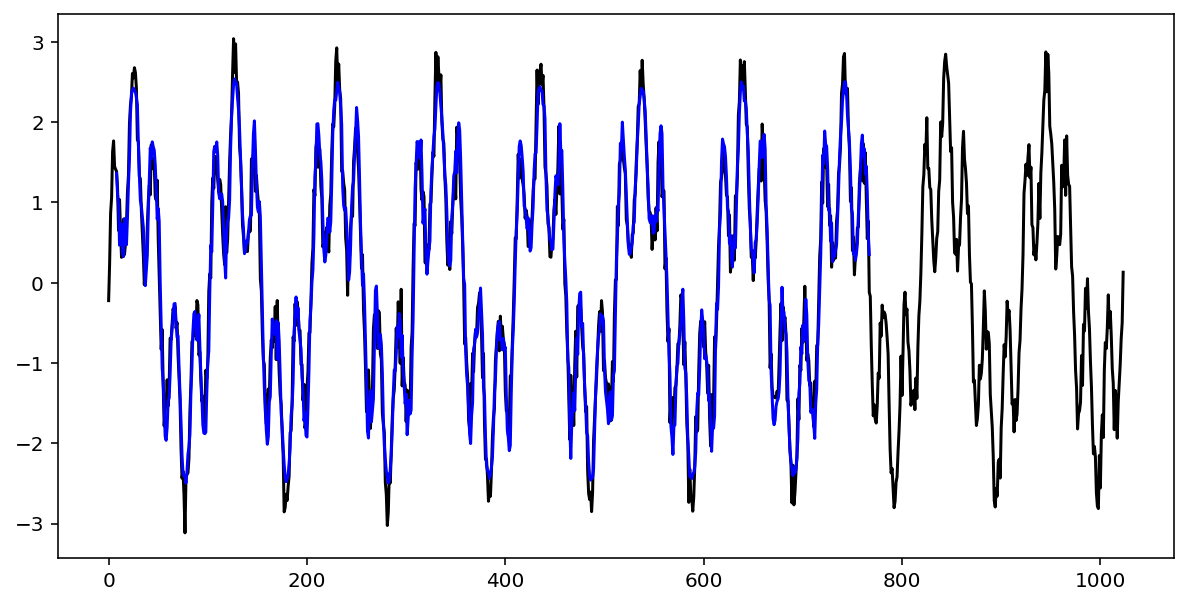

In [8]:
trainPredict = model.predict(xx) 
plt.figure(figsize = (10, 5)) 
plt.plot(F, 'k') 
plt.plot(np.r_[8:768],trainPredict, 'b') 
plt.show() 

In [9]:
data_gen = TimeseriesGenerator(F_test, F_test, length=8, sampling_rate=1, batch_size=768) 
batch_0 = data_gen[0] 
x, y = batch_0 
xx=np.reshape(x, (x.shape[0], 1, x.shape[1])) 
yy = y 
print(xx.shape)   
print(yy.shape)   

(256, 1, 8)
(256,)


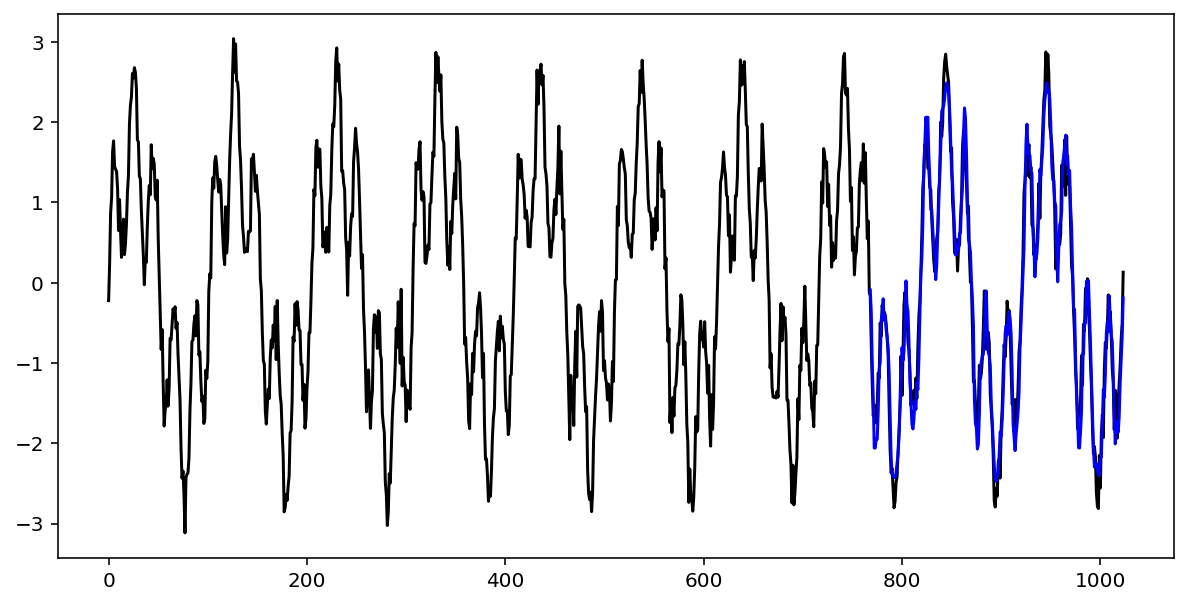

In [10]:
testPredict = model.predict(xx) 
plt.figure(figsize = (10, 5)) 
plt.plot(F, 'k') 
plt.plot(np.r_[768:1024],testPredict, 'b') 
plt.show() 

In [0]:
#12

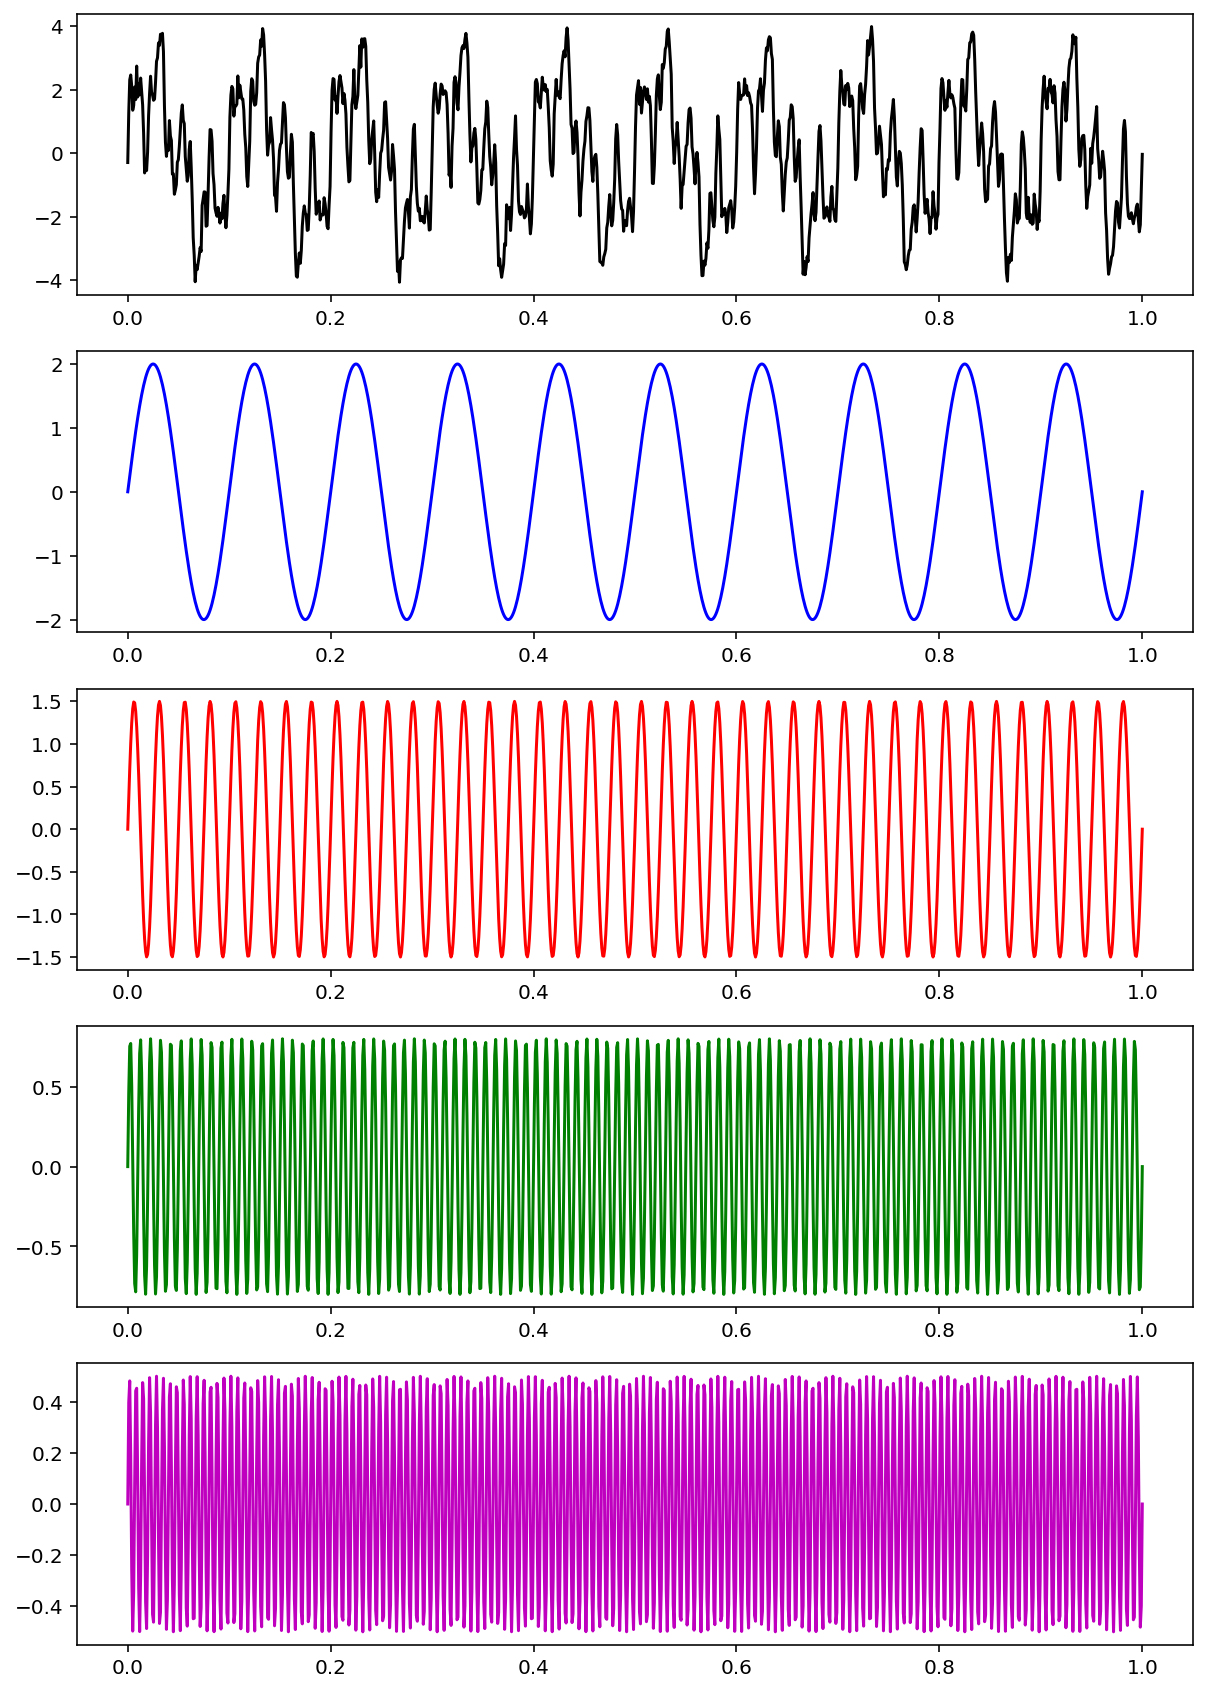

In [2]:
t = np.linspace(0,1,1024) 
f1 = 10 
f2 = 40 
f3 = 100 
f4 = 150 
F=2.0*np.sin(2*np.pi*f1*t)+1.5*np.sin(2*np.pi*f2*t) + 0.8*np.sin(2*np.pi*f3*t) + 0.5*np.sin(2*np.pi*f4*t)+0.2*np.random.randn(len(t))
plt.figure(figsize = (10, 15)) 
plt.subplot(5,1,1) 
plt.plot(t, F, 'k') 
plt.subplot(5,1,2) 
plt.plot(t, 2.0*np.sin(2*np.pi*f1*t), 'b') 
plt.subplot(5,1,3)
plt.plot(t, 1.5*np.sin(2*np.pi*f2*t), 'r') 
plt.subplot(5,1,4) 
plt.plot(t, 0.8*np.sin(2*np.pi*f3*t), 'g') 
plt.subplot(5,1,5) 
plt.plot(t, 0.5*np.sin(2*np.pi*f4*t), 'm') 
plt.show() 

 
 

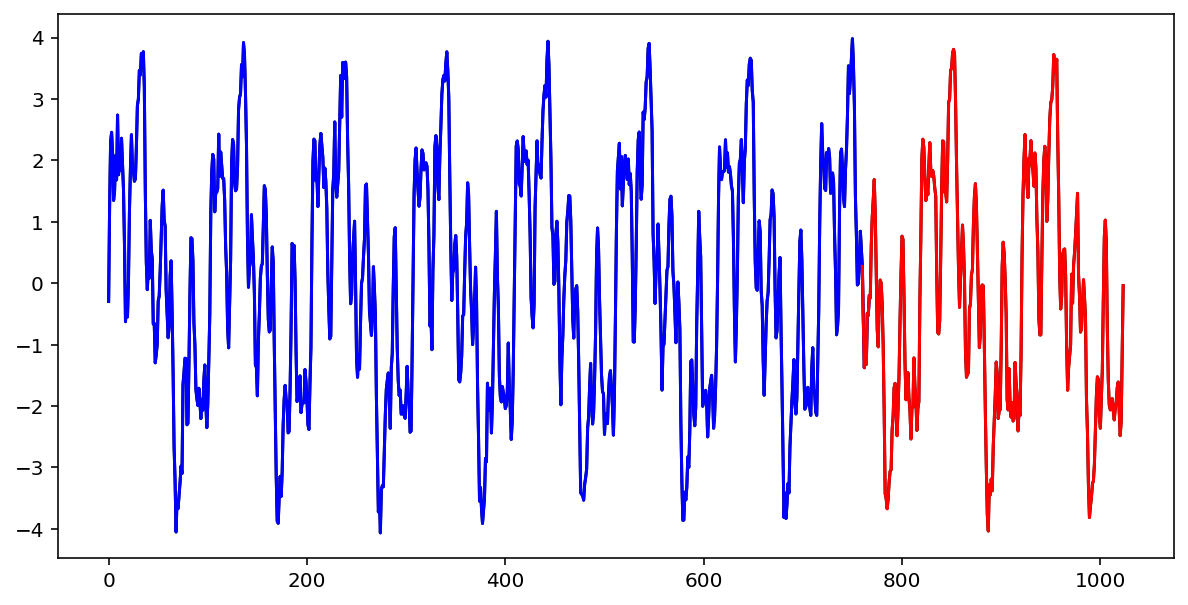

In [3]:
F_tr = F[:768] 
F_test = F[760:] 
plt.figure(figsize = (10, 5)) 
plt.plot(F, 'k') 
plt.plot(np.r_[:768],F_tr, 'b') 
plt.plot(np.r_[760:1024],F_test, 'r') 
plt.show() 

In [4]:
from keras.preprocessing.sequence import TimeseriesGenerator
data_gen = TimeseriesGenerator(F_tr, F_tr,length=8, sampling_rate=1, batch_size=768)

batch_0 = data_gen[0]
x, y = batch_0 # вход и обучающий выход для сети
print(x.shape) #
xx=np.reshape(x, (x.shape[0], 1, x.shape[1]))
yy=y
print(xx.shape) # меняем местами размерности
print(yy.shape) #

(760, 8)
(760, 1, 8)
(760,)


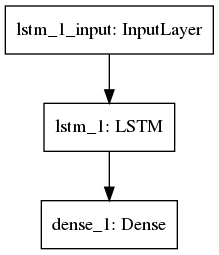

In [5]:
from keras.utils import plot_model
model = Sequential() # слои соединены последовательно
model.add(LSTM(units=30, input_shape=(1, 8))) 
model.add(Dense(units = 1)) # выход одномерный
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
plot_model(model, to_file='model.png') # рисунок полученной сети

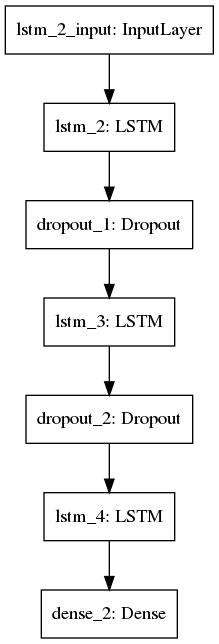

In [6]:
from keras.utils import plot_model 
model = Sequential() 
model.add(LSTM(units=30, return_sequences=True, input_shape=(1, 8))) 
model.add(Dropout(0.4)) 
model.add(LSTM(units=30, return_sequences=True)) 
model.add(Dropout(0.4)) 
model.add(LSTM(units=30)) 
model.add(Dense(units = 1)) 
model.compile(optimizer = 'adam', loss = 'mean_squared_error') 
plot_model(model, to_file='model.png') 

In [7]:
model.fit(xx, yy, epochs = 100)  #

Epoch 1/100


 32/760 [>.............................] - ETA: 3:06 - loss: 3.9687

 96/760 [==>...........................] - ETA: 57s - loss: 3.3256 

128/760 [====>.........................] - ETA: 41s - loss: 3.1404

224/760 [=======>......................] - ETA: 20s - loss: 3.4200

288/760 [==========>...................] - ETA: 13s - loss: 3.3781

384/760 [==============>...............] - ETA: 8s - loss: 3.5464 

480/760 [=================>............] - ETA: 5s - loss: 3.5072

672/760 [=========================>....] - ETA: 1s - loss: 3.5169

760/760 [==============================] - 9s 12ms/step - loss: 3.5569


Epoch 2/100


 32/760 [>.............................] - ETA: 1s - loss: 4.3473

192/760 [======>.......................] - ETA: 0s - loss: 3.5653

352/760 [============>.................] - ETA: 0s - loss: 3.5207

544/760 [====================>.........] - ETA: 0s - loss: 3.3371

704/760 [==========================>...] - ETA: 0s - loss: 3.2590

760/760 [==============================] - 0s 636us/step - loss: 3.2069


Epoch 3/100
 32/760 [>.............................] - ETA: 0s - loss: 3.4549

160/760 [=====>........................] - ETA: 0s - loss: 2.3756

352/760 [============>.................] - ETA: 0s - loss: 2.5126

544/760 [====================>.........] - ETA: 0s - loss: 2.4528

760/760 [==============================] - 0s 512us/step - loss: 2.3570


Epoch 4/100
 32/760 [>.............................] - ETA: 0s - loss: 2.3680

160/760 [=====>........................] - ETA: 0s - loss: 1.9653

288/760 [==========>...................] - ETA: 0s - loss: 1.9923

352/760 [============>.................] - ETA: 0s - loss: 1.9435

608/760 [=======================>......] - ETA: 0s - loss: 1.7782

760/760 [==============================] - 0s 519us/step - loss: 1.7045


Epoch 5/100


 32/760 [>.............................] - ETA: 0s - loss: 1.3729

224/760 [=======>......................] - ETA: 0s - loss: 1.2848

416/760 [===============>..............] - ETA: 0s - loss: 1.3504

480/760 [=================>............] - ETA: 0s - loss: 1.2995

704/760 [==========================>...] - ETA: 0s - loss: 1.2163

760/760 [==============================] - 0s 409us/step - loss: 1.2252


Epoch 6/100
 32/760 [>.............................] - ETA: 0s - loss: 1.3210

160/760 [=====>........................] - ETA: 0s - loss: 1.1158

352/760 [============>.................] - ETA: 0s - loss: 1.0772

448/760 [================>.............] - ETA: 0s - loss: 1.0115

672/760 [=========================>....] - ETA: 0s - loss: 0.9482

760/760 [==============================] - 0s 409us/step - loss: 0.9256


Epoch 7/100
 32/760 [>.............................] - ETA: 0s - loss: 1.1575

 64/760 [=>............................] - ETA: 0s - loss: 1.0054

128/760 [====>.........................] - ETA: 0s - loss: 0.8654

224/760 [=======>......................] - ETA: 0s - loss: 0.8310

384/760 [==============>...............] - ETA: 0s - loss: 0.7416

608/760 [=======================>......] - ETA: 0s - loss: 0.7397

760/760 [==============================] - 0s 559us/step - loss: 0.7531


Epoch 8/100
 32/760 [>.............................] - ETA: 1s - loss: 0.7211

224/760 [=======>......................] - ETA: 0s - loss: 0.7016

480/760 [=================>............] - ETA: 0s - loss: 0.6414

608/760 [=======================>......] - ETA: 0s - loss: 0.6575

760/760 [==============================] - 0s 511us/step - loss: 0.6544


Epoch 9/100


 32/760 [>.............................] - ETA: 1s - loss: 0.5756

160/760 [=====>........................] - ETA: 0s - loss: 0.5137

352/760 [============>.................] - ETA: 0s - loss: 0.5568

512/760 [===================>..........] - ETA: 0s - loss: 0.5508

672/760 [=========================>....] - ETA: 0s - loss: 0.5535

760/760 [==============================] - 0s 640us/step - loss: 0.5677


Epoch 10/100
 32/760 [>.............................] - ETA: 1s - loss: 0.5127

224/760 [=======>......................] - ETA: 0s - loss: 0.5572

416/760 [===============>..............] - ETA: 0s - loss: 0.5724

576/760 [=====================>........] - ETA: 0s - loss: 0.5578

760/760 [==============================] - 0s 610us/step - loss: 0.5423


Epoch 11/100


 32/760 [>.............................] - ETA: 0s - loss: 0.5055

160/760 [=====>........................] - ETA: 0s - loss: 0.4528

256/760 [=========>....................] - ETA: 0s - loss: 0.4348

384/760 [==============>...............] - ETA: 0s - loss: 0.4511

512/760 [===================>..........] - ETA: 0s - loss: 0.4634

640/760 [========================>.....] - ETA: 0s - loss: 0.4702

760/760 [==============================] - 1s 702us/step - loss: 0.4740


Epoch 12/100
 32/760 [>.............................] - ETA: 0s - loss: 0.4914

 64/760 [=>............................] - ETA: 0s - loss: 0.4624

192/760 [======>.......................] - ETA: 0s - loss: 0.4814

352/760 [============>.................] - ETA: 0s - loss: 0.4583

512/760 [===================>..........] - ETA: 0s - loss: 0.4857

640/760 [========================>.....] - ETA: 0s - loss: 0.4770

736/760 [============================>.] - ETA: 0s - loss: 0.4651

760/760 [==============================] - 1s 752us/step - loss: 0.4632


Epoch 13/100
 32/760 [>.............................] - ETA: 0s - loss: 0.6062

160/760 [=====>........................] - ETA: 0s - loss: 0.4587

256/760 [=========>....................] - ETA: 0s - loss: 0.4522

416/760 [===============>..............] - ETA: 0s - loss: 0.4360

640/760 [========================>.....] - ETA: 0s - loss: 0.4270

760/760 [==============================] - 0s 643us/step - loss: 0.4473


Epoch 14/100
 32/760 [>.............................] - ETA: 0s - loss: 0.5776

160/760 [=====>........................] - ETA: 0s - loss: 0.4552

448/760 [================>.............] - ETA: 0s - loss: 0.4131

672/760 [=========================>....] - ETA: 0s - loss: 0.4354

760/760 [==============================] - 0s 412us/step - loss: 0.4398


Epoch 15/100
 32/760 [>.............................] - ETA: 0s - loss: 0.4502

128/760 [====>.........................] - ETA: 0s - loss: 0.3748

288/760 [==========>...................] - ETA: 0s - loss: 0.3867

512/760 [===================>..........] - ETA: 0s - loss: 0.4157

704/760 [==========================>...] - ETA: 0s - loss: 0.4316

760/760 [==============================] - 0s 526us/step - loss: 0.4192


Epoch 16/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2642

192/760 [======>.......................] - ETA: 0s - loss: 0.3994

384/760 [==============>...............] - ETA: 0s - loss: 0.3660

512/760 [===================>..........] - ETA: 0s - loss: 0.3746

672/760 [=========================>....]

 - ETA: 0s - loss: 0.4040

760/760 [==============================] - 0s 537us/step - loss: 0.3969


Epoch 17/100
 32/760 [>.............................] - ETA: 0s - loss: 0.5377

128/760 [====>.........................] - ETA: 0s - loss: 0.3868

352/760 [============>.................] - ETA: 0s - loss: 0.4050

640/760 [========================>.....] - ETA: 0s - loss: 0.4254

760/760 [==============================] - 0s 390us/step - loss: 0.4171


Epoch 18/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2745

 96/760 [==>...........................] - ETA: 0s - loss: 0.3915

384/760 [==============>...............] - ETA: 0s - loss: 0.3975

640/760 [========================>.....] - ETA: 0s - loss: 0.4115

760/760 [==============================] - 0s 393us/step - loss: 0.4303


Epoch 19/100
 32/760 [>.............................] - ETA: 0s - loss: 0.4409

160/760 [=====>........................] - ETA: 0s - loss: 0.3785

352/760 [============>.................] - ETA: 0s - loss: 0.3749

480/760 [=================>............] - ETA: 0s - loss: 0.3840

704/760 [==========================>...] - ETA: 0s - loss: 0.3818

760/760 [==============================] - 0s 389us/step - loss: 0.3780


Epoch 20/100
 32/760 [>.............................] - ETA: 0s - loss: 0.3267

128/760 [====>.........................] - ETA: 0s - loss: 0.4695

416/760 [===============>..............] - ETA: 0s - loss: 0.4122

608/760 [=======================>......] - ETA: 0s - loss: 0.3953

760/760 [==============================] - 0s 387us/step - loss: 0.3877


Epoch 21/100
 32/760 [>.............................] - ETA: 0s - loss: 0.4998

192/760 [======>.......................] - ETA: 0s - loss: 0.3987

384/760 [==============>...............] - ETA: 0s - loss: 0.4097

672/760 [=========================>....] - ETA: 0s - loss: 0.3973

760/760 [==============================] - 0s 398us/step - loss: 0.4019


Epoch 22/100
 32/760 [>.............................] - ETA: 0s - loss: 0.4053

160/760 [=====>........................] - ETA: 0s - loss: 0.2939

384/760 [==============>...............] - ETA: 0s - loss: 0.3209

448/760 [================>.............] - ETA: 0s - loss: 0.3136

672/760 [=========================>....] - ETA: 0s - loss: 0.3502

760/760 [==============================] - 0s 401us/step - loss: 0.3531


Epoch 23/100
 32/760 [>.............................] - ETA: 0s - loss: 0.3321

160/760 [=====>........................] - ETA: 0s - loss: 0.4063

416/760 [===============>..............] - ETA: 0s - loss: 0.3875

704/760 [==========================>...] - ETA: 0s - loss: 0.3693

760/760 [==============================] - 0s 381us/step - loss: 0.3665


Epoch 24/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2746

192/760 [======>.......................] - ETA: 0s - loss: 0.3843

480/760 [=================>............] - ETA: 0s - loss: 0.3771

704/760 [==========================>...] - ETA: 0s - loss: 0.3776

760/760 [==============================] - 0s 377us/step - loss: 0.3740


Epoch 25/100
 32/760 [>.............................] - ETA: 0s - loss: 0.5484

256/760 [=========>....................] - ETA: 0s - loss: 0.3621

544/760 [====================>.........] - ETA: 0s - loss: 0.3940

760/760 [==============================] - 0s 311us/step - loss: 0.3869


Epoch 26/100


 32/760 [>.............................] - ETA: 0s - loss: 0.4348

256/760 [=========>....................] - ETA: 0s - loss: 0.3946

288/760 [==========>...................] - ETA: 0s - loss: 0.4212

480/760 [=================>............] - ETA: 0s - loss: 0.3663

640/760 [========================>.....] - ETA: 0s - loss: 0.3567

760/760 [==============================] - 0s 399us/step - loss: 0.3747


Epoch 27/100
 32/760 [>.............................] - ETA: 0s - loss: 0.4657

256/760 [=========>....................] - ETA: 0s - loss: 0.3809

384/760 [==============>...............] - ETA: 0s - loss: 0.3571

576/760 [=====================>........] - ETA: 0s - loss: 0.3585

736/760 [============================>.] - ETA: 0s - loss: 0.3579

760/760 [==============================] - 0s 356us/step - loss: 0.3587


Epoch 28/100
 32/760 [>.............................] - ETA: 0s - loss: 0.5795

256/760 [=========>....................] - ETA: 0s - loss: 0.3726

384/760 [==============>...............] - ETA: 0s - loss: 0.3506

640/760 [========================>.....] - ETA: 0s - loss: 0.3380

760/760 [==============================] - 0s 339us/step - loss: 0.3420


Epoch 29/100
 32/760 [>.............................] - ETA: 0s - loss: 0.3837

 96/760 [==>...........................] - ETA: 0s - loss: 0.4124

352/760 [============>.................] - ETA: 0s - loss: 0.3562

416/760 [===============>..............] - ETA: 0s - loss: 0.3551

640/760 [========================>.....] - ETA: 0s - loss: 0.3300

760/760 [==============================] - 0s 365us/step - loss: 0.3314


Epoch 30/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2864

224/760 [=======>......................] - ETA: 0s - loss: 0.3470

480/760 [=================>............] - ETA: 0s - loss: 0.3518

704/760 [==========================>...] - ETA: 0s - loss: 0.3544

760/760 [==============================] - 0s 383us/step - loss: 0.3543


Epoch 31/100
 32/760 [>.............................] - ETA: 0s - loss: 0.3139

224/760 [=======>......................] - ETA: 0s - loss: 0.3386

480/760 [=================>............] - ETA: 0s - loss: 0.3525

736/760 [============================>.] - ETA: 0s - loss: 0.3519

760/760 [==============================] - 0s 394us/step - loss: 0.3496


Epoch 32/100
 32/760 [>.............................] - ETA: 0s - loss: 0.4056

256/760 [=========>....................] - ETA: 0s - loss: 0.3293

512/760 [===================>..........] - ETA: 0s - loss: 0.3528

760/760 [==============================] - 0s 383us/step - loss: 0.3568


Epoch 33/100


 32/760 [>.............................] - ETA: 0s - loss: 0.4312

256/760 [=========>....................] - ETA: 0s - loss: 0.3624

480/760 [=================>............] - ETA: 0s - loss: 0.3374

736/760 [============================>.] - ETA: 0s - loss: 0.3399

760/760 [==============================] - 0s 398us/step - loss: 0.3382


Epoch 34/100
 32/760 [>.............................] - ETA: 0s - loss: 0.4282

224/760 [=======>......................] - ETA: 0s - loss: 0.3314

480/760 [=================>............] - ETA: 0s - loss: 0.3115

760/760 [==============================] - 0s 385us/step - loss: 0.3072


Epoch 35/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2007

256/760 [=========>....................] - ETA: 0s - loss: 0.2893

480/760 [=================>............] - ETA: 0s - loss: 0.3274

544/760 [====================>.........] - ETA: 0s - loss: 0.3372

760/760 [==============================] - 0s 308us/step - loss: 0.3306


Epoch 36/100
 32/760 [>.............................] - ETA: 1s - loss: 0.3137

288/760 [==========>...................]

 - ETA: 0s - loss: 0.3227

544/760 [====================>.........] - ETA: 0s - loss: 0.3298

760/760 [==============================] - 0s 425us/step - loss: 0.3269


Epoch 37/100
 32/760 [>.............................] - ETA: 0s - loss: 0.3533

 96/760 [==>...........................] - ETA: 0s - loss: 0.3257

288/760 [==========>...................] - ETA: 0s - loss: 0.3341

512/760 [===================>..........] - ETA: 0s - loss: 0.3451

736/760 [============================>.] - ETA: 0s - loss: 0.3402

760/760 [==============================] - 0s 453us/step - loss: 0.3413


Epoch 38/100
 32/760 [>.............................] - ETA: 0s - loss: 0.3832

224/760 [=======>......................] - ETA: 0s - loss: 0.3313

448/760 [================>.............] - ETA: 0s - loss: 0.3311

672/760 [=========================>....] - ETA: 0s - loss: 0.3117

760/760 [==============================] - 0s 431us/step - loss: 0.3152


Epoch 39/100
 32/760 [>.............................] - ETA: 0s - loss: 0.3571

128/760 [====>.........................] - ETA: 0s - loss: 0.3978

352/760 [============>.................] - ETA: 0s - loss: 0.3528

576/760 [=====================>........] - ETA: 0s - loss: 0.3516

760/760 [==============================] - 0s 476us/step - loss: 0.3303


Epoch 40/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2552

224/760 [=======>......................] - ETA: 0s - loss: 0.3181

448/760 [================>.............] - ETA: 0s - loss: 0.3157

672/760 [=========================>....] - ETA: 0s - loss: 0.3272

760/760 [==============================] - 0s 436us/step - loss: 0.3274


Epoch 41/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2137

 96/760 [==>...........................] - ETA: 0s - loss: 0.3050

256/760 [=========>....................] - ETA: 0s - loss: 0.2905

448/760 [================>.............] - ETA: 0s - loss: 0.3015

640/760 [========================>.....] - ETA: 0s - loss: 0.3087

736/760 [============================>.] - ETA: 0s - loss: 0.3157

760/760 [==============================] - 0s 500us/step - loss: 0.3146


Epoch 42/100
 32/760 [>.............................] - ETA: 0s - loss: 0.4087

192/760 [======>.......................] - ETA: 0s - loss: 0.3389

384/760 [==============>...............] - ETA: 0s - loss: 0.3321

608/760 [=======================>......] - ETA: 0s - loss: 0.3114

760/760 [==============================] - 0s 422us/step - loss: 0.3053


Epoch 43/100


 32/760 [>.............................] - ETA: 1s - loss: 0.4086

224/760 [=======>......................] - ETA: 0s - loss: 0.2794

416/760 [===============>..............] - ETA: 0s - loss: 0.2944

608/760 [=======================>......] - ETA: 0s - loss: 0.3071

760/760 [==============================] - 0s 515us/step - loss: 0.3012


Epoch 44/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2724

 64/760 [=>............................] - ETA: 0s - loss: 0.3513

288/760 [==========>...................] - ETA: 0s - loss: 0.3020

512/760 [===================>..........] - ETA: 0s - loss: 0.3082

640/760 [========================>.....] - ETA: 0s - loss: 0.3051

760/760 [==============================] - 0s 402us/step - loss: 0.3119


Epoch 45/100
 32/760 [>.............................] - ETA: 0s - loss: 0.5123

 64/760 [=>............................] - ETA: 0s - loss: 0.4942

288/760 [==========>...................] - ETA: 0s - loss: 0.3892

352/760 [============>.................] - ETA: 0s - loss: 0.3649

608/760 [=======================>......]

 - ETA: 0s - loss: 0.3551

760/760 [==============================] - 0s 383us/step - loss: 0.3446


Epoch 46/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2499

 64/760 [=>............................] - ETA: 0s - loss: 0.2734

320/760 [===========>..................] - ETA: 0s - loss: 0.3148

576/760 [=====================>........] - ETA: 0s - loss: 0.3165

760/760 [==============================] - 0s 395us/step - loss: 0.3201


Epoch 47/100
 32/760 [>.............................] - ETA: 1s - loss: 0.3776

288/760 [==========>...................] - ETA: 0s - loss: 0.2946

544/760 [====================>.........] - ETA: 0s - loss: 0.2939

608/760 [=======================>......] - ETA: 0s - loss: 0.2861

760/760 [==============================] - 0s 397us/step - loss: 0.2904


Epoch 48/100
 32/760 [>.............................] - ETA: 0s - loss: 0.3476

 64/760 [=>............................] - ETA: 0s - loss: 0.3600

288/760 [==========>...................] - ETA: 0s - loss: 0.3255

544/760 [====================>.........] - ETA: 0s - loss: 0.3263

608/760 [=======================>......] - ETA: 0s - loss: 0.3298

760/760 [==============================] - 0s 407us/step - loss: 0.3277


Epoch 49/100
 32/760 [>.............................] - ETA: 0s - loss: 0.3749

 64/760 [=>............................] - ETA: 0s - loss: 0.3484

320/760 [===========>..................] - ETA: 0s - loss: 0.3249

576/760 [=====================>........] - ETA: 0s - loss: 0.3264

760/760 [==============================] - 0s 384us/step - loss: 0.3182


Epoch 50/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2373

 64/760 [=>............................] - ETA: 0s - loss: 0.2965

320/760 [===========>..................] - ETA: 0s - loss: 0.2938

352/760 [============>.................] - ETA: 0s - loss: 0.2879

576/760 [=====================>........] - ETA: 0s - loss: 0.2939

760/760 [==============================] - 0s 387us/step - loss: 0.2977


Epoch 51/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2065

 96/760 [==>...........................] - ETA: 0s - loss: 0.2560

384/760 [==============>...............] - ETA: 0s - loss: 0.3104

640/760 [========================>.....] - ETA: 0s - loss: 0.3078

704/760 [==========================>...] - ETA: 0s - loss: 0.3105

760/760 [==============================] - 0s 392us/step - loss: 0.3040


Epoch 52/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2477

128/760 [====>.........................] - ETA: 0s - loss: 0.3031

352/760 [============>.................] - ETA: 0s - loss: 0.3016

384/760 [==============>...............] - ETA: 0s - loss: 0.2957

640/760 [========================>.....] - ETA: 0s - loss: 0.2936

704/760 [==========================>...] - ETA: 0s - loss: 0.2938

760/760 [==============================] - 0s 377us/step - loss: 0.2958


Epoch 53/100
 32/760 [>.............................] - ETA: 0s - loss: 0.4351

128/760 [====>.........................] - ETA: 0s - loss: 0.3728

384/760 [==============>...............] - ETA: 0s - loss: 0.3176

640/760 [========================>.....] - ETA: 0s - loss: 0.2966

760/760 [==============================] - 0s 398us/step - loss: 0.3033


Epoch 54/100
 32/760 [>.............................] - ETA: 0s - loss: 0.3068

 96/760 [==>...........................] - ETA: 0s - loss: 0.2964

320/760 [===========>..................] - ETA: 0s - loss: 0.3290

576/760 [=====================>........] - ETA: 0s - loss: 0.2983

760/760 [==============================] - 0s 426us/step - loss: 0.2925


Epoch 55/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2475

160/760 [=====>........................] - ETA: 0s - loss: 0.2924

384/760 [==============>...............] - ETA: 0s - loss: 0.3035

640/760 [========================>.....] - ETA: 0s - loss: 0.3074

760/760 [==============================] - 0s 362us/step - loss: 0.3108


Epoch 56/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2217

 64/760 [=>............................] - ETA: 0s - loss: 0.2733

288/760 [==========>...................] - ETA: 0s - loss: 0.3288

480/760 [=================>............] - ETA: 0s - loss: 0.3236

672/760 [=========================>....] - ETA: 0s - loss: 0.2989

760/760 [==============================] - 0s 514us/step - loss: 0.3011


Epoch 57/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1811

 96/760 [==>...........................] - ETA: 0s - loss: 0.2871

256/760 [=========>....................] - ETA: 0s - loss: 0.2749

448/760 [================>.............] - ETA: 0s - loss: 0.2633

480/760 [=================>............] - ETA: 0s - loss: 0.2711

640/760 [========================>.....] - ETA: 0s - loss: 0.2799

760/760 [==============================] - 0s 536us/step - loss: 0.2874


Epoch 58/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2807

 64/760 [=>............................] - ETA: 0s - loss: 0.2834

192/760 [======>.......................] - ETA: 0s - loss: 0.3036

352/760 [============>.................] - ETA: 0s - loss: 0.2885

448/760 [================>.............] - ETA: 0s - loss: 0.2817

672/760 [=========================>....] - ETA: 0s - loss: 0.3116

760/760 [==============================] - 0s 526us/step - loss: 0.3041


Epoch 59/100
 32/760 [>.............................] - ETA: 0s - loss: 0.3461

 96/760 [==>...........................] - ETA: 0s - loss: 0.3259

288/760 [==========>...................] - ETA: 0s - loss: 0.3022

352/760 [============>.................] - ETA: 0s - loss: 0.3141

512/760 [===================>..........] - ETA: 0s - loss: 0.2936

704/760 [==========================>...] - ETA: 0s - loss: 0.2982

760/760 [==============================] - 0s 510us/step - loss: 0.2991


Epoch 60/100
 32/760 [>.............................] - ETA: 0s - loss: 0.3414

 96/760 [==>...........................] - ETA: 0s - loss: 0.2773

320/760 [===========>..................] - ETA: 0s - loss: 0.2758

576/760 [=====================>........] - ETA: 0s - loss: 0.3013

760/760 [==============================] - 0s 444us/step - loss: 0.2974


Epoch 61/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1902

256/760 [=========>....................] - ETA: 0s - loss: 0.2693

448/760 [================>.............] - ETA: 0s - loss: 0.2701

704/760 [==========================>...] - ETA: 0s - loss: 0.2756

760/760 [==============================] - 0s 465us/step - loss: 0.2717


Epoch 62/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2831

160/760 [=====>........................] - ETA: 0s - loss: 0.3132

416/760 [===============>..............] - ETA: 0s - loss: 0.3179

640/760 [========================>.....] - ETA: 0s - loss: 0.3027

760/760 [==============================] - 0s 411us/step - loss: 0.2979


Epoch 63/100


 32/760 [>.............................] - ETA: 1s - loss: 0.3894

192/760 [======>.......................] - ETA: 0s - loss: 0.2759

416/760 [===============>..............] - ETA: 0s - loss: 0.2898

640/760 [========================>.....] - ETA: 0s - loss: 0.3173

760/760 [==============================] - 0s 540us/step - loss: 0.3090


Epoch 64/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2797

 64/760 [=>............................] - ETA: 0s - loss: 0.3211

288/760 [==========>...................] - ETA: 0s - loss: 0.2939

576/760 [=====================>........] - ETA: 0s - loss: 0.2939

760/760 [==============================] - 0s 382us/step - loss: 0.2843


Epoch 65/100
 32/760 [>.............................] - ETA: 1s - loss: 0.3442

288/760 [==========>...................] - ETA: 0s - loss: 0.3194

512/760 [===================>..........] - ETA: 0s - loss: 0.3000

672/760 [=========================>....] - ETA: 0s - loss: 0.3017

760/760 [==============================] - 0s 487us/step - loss: 0.2984


Epoch 66/100
 32/760 [>.............................] - ETA: 0s - loss: 0.3144

160/760 [=====>........................] - ETA: 0s - loss: 0.2548

352/760 [============>.................] - ETA: 0s - loss: 0.2861

608/760 [=======================>......] - ETA: 0s - loss: 0.2755

760/760 [==============================] - 0s 432us/step - loss: 0.2964


Epoch 67/100


 32/760 [>.............................] - ETA: 1s - loss: 0.3485

224/760 [=======>......................] - ETA: 0s - loss: 0.2744

448/760 [================>.............] - ETA: 0s - loss: 0.2795

512/760 [===================>..........] - ETA: 0s - loss: 0.2802

672/760 [=========================>....] - ETA: 0s - loss: 0.2774

760/760 [==============================] - 0s 503us/step - loss: 0.2856


Epoch 68/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2475

 96/760 [==>...........................] - ETA: 0s - loss: 0.2343

320/760 [===========>..................] - ETA: 0s - loss: 0.3181

544/760 [====================>.........] - ETA: 0s - loss: 0.3037

704/760 [==========================>...] - ETA: 0s - loss: 0.2897

760/760 [==============================] - 0s 535us/step - loss: 0.2877


Epoch 69/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2436

 96/760 [==>...........................] - ETA: 0s - loss: 0.2597

320/760 [===========>..................] - ETA: 0s - loss: 0.2597

480/760 [=================>............] - ETA: 0s - loss: 0.2648

672/760 [=========================>....] - ETA: 0s - loss: 0.2618

760/760 [==============================] - 0s 511us/step - loss: 0.2687


Epoch 70/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2159

 96/760 [==>...........................] - ETA: 0s - loss: 0.2269

320/760 [===========>..................] - ETA: 0s - loss: 0.2819

512/760 [===================>..........] - ETA: 0s - loss: 0.2791

736/760 [============================>.] - ETA: 0s - loss: 0.2909

760/760 [==============================] - 0s 510us/step - loss: 0.2938


Epoch 71/100
 32/760 [>.............................] - ETA: 0s - loss: 0.4093

160/760 [=====>........................] - ETA: 0s - loss: 0.3066

384/760 [==============>...............] - ETA: 0s - loss: 0.2872

608/760 [=======================>......] - ETA: 0s - loss: 0.2833

760/760 [==============================] - 0s 428us/step - loss: 0.2841


Epoch 72/100
 32/760 [>.............................] - ETA: 1s - loss: 0.4090

224/760 [=======>......................] - ETA: 0s - loss: 0.3275

480/760 [=================>............] - ETA: 0s - loss: 0.2965

736/760 [============================>.] - ETA: 0s - loss: 0.2898

760/760 [==============================] - 0s 495us/step - loss: 0.2885


Epoch 73/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2994

128/760 [====>.........................] - ETA: 0s - loss: 0.3185

352/760 [============>.................] - ETA: 0s - loss: 0.2978

544/760 [====================>.........] - ETA: 0s - loss: 0.3064

760/760 [==============================] - 0s 448us/step - loss: 0.2908


Epoch 74/100
 32/760 [>.............................] - ETA: 1s - loss: 0.3562

256/760 [=========>....................] - ETA: 0s - loss: 0.2609

544/760 [====================>.........] - ETA: 0s - loss: 0.2757

760/760 [==============================] - 0s 371us/step - loss: 0.2787


Epoch 75/100


 32/760 [>.............................] - ETA: 1s - loss: 0.2453

192/760 [======>.......................] - ETA: 0s - loss: 0.2545

416/760 [===============>..............] - ETA: 0s - loss: 0.2522

544/760 [====================>.........] - ETA: 0s - loss: 0.2498

760/760 [==============================] - 0s 477us/step - loss: 0.2633


Epoch 76/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2731

224/760 [=======>......................] - ETA: 0s - loss: 0.2701

480/760 [=================>............] - ETA: 0s - loss: 0.2910

736/760 [============================>.] - ETA: 0s - loss: 0.2833

760/760 [==============================] - 0s 402us/step - loss: 0.2809


Epoch 77/100
 32/760 [>.............................] - ETA: 0s - loss: 0.4759

160/760 [=====>........................] - ETA: 0s - loss: 0.2953

416/760 [===============>..............] - ETA: 0s - loss: 0.2711

608/760 [=======================>......] - ETA: 0s - loss: 0.2834

672/760 [=========================>....] - ETA: 0s - loss: 0.2765

760/760 [==============================] - 0s 420us/step - loss: 0.2720


Epoch 78/100
 32/760 [>.............................] - ETA: 1s - loss: 0.2161

224/760 [=======>......................] - ETA: 0s - loss: 0.2840

480/760 [=================>............] - ETA: 0s - loss: 0.2929

704/760 [==========================>...] - ETA: 0s - loss: 0.2809

760/760 [==============================] - 0s 490us/step - loss: 0.2838


Epoch 79/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2330

192/760 [======>.......................]

 - ETA: 0s - loss: 0.2476

416/760 [===============>..............] - ETA: 0s - loss: 0.2784

640/760 [========================>.....] - ETA: 0s - loss: 0.2880

760/760 [==============================] - 0s 416us/step - loss: 0.2833


Epoch 80/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2694

 64/760 [=>............................] - ETA: 0s - loss: 0.2771

288/760 [==========>...................] - ETA: 0s - loss: 0.3302

352/760 [============>.................] - ETA: 0s - loss: 0.3200

576/760 [=====================>........] - ETA: 0s - loss: 0.2949

760/760 [==============================] - 0s 425us/step - loss: 0.2878


Epoch 81/100


 32/760 [>.............................] - ETA: 0s - loss: 0.3943

 96/760 [==>...........................] - ETA: 0s - loss: 0.2750

256/760 [=========>....................] - ETA: 0s - loss: 0.3060

480/760 [=================>............] - ETA: 0s - loss: 0.2932

704/760 [==========================>...] - ETA: 0s - loss: 0.2841

760/760 [==============================] - 0s 478us/step - loss: 0.2812


Epoch 82/100
 32/760 [>.............................] - ETA: 0s - loss: 0.3173

128/760 [====>.........................] - ETA: 0s - loss: 0.3173

320/760 [===========>..................] - ETA: 0s - loss: 0.2813

384/760 [==============>...............] - ETA: 0s - loss: 0.2732

640/760 [========================>.....] - ETA: 0s - loss: 0.2861

760/760 [==============================] - 0s 404us/step - loss: 0.2872


Epoch 83/100
 32/760 [>.............................] - ETA: 0s - loss: 0.3206

 96/760 [==>...........................] - ETA: 0s - loss: 0.2916

320/760 [===========>..................] - ETA: 0s - loss: 0.2971

576/760 [=====================>........] - ETA: 0s - loss: 0.2904

608/760 [=======================>......] - ETA: 0s - loss: 0.2928

760/760 [==============================] - 0s 412us/step - loss: 0.2925


Epoch 84/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2524

 64/760 [=>............................] - ETA: 0s - loss: 0.3178

224/760 [=======>......................] - ETA: 0s - loss: 0.2916

480/760 [=================>............] - ETA: 0s - loss: 0.2777

736/760 [============================>.] - ETA: 0s - loss: 0.2876

760/760 [==============================] - 0s 501us/step - loss: 0.2844


Epoch 85/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2893

160/760 [=====>........................] - ETA: 0s - loss: 0.3204

416/760 [===============>..............] - ETA: 0s - loss: 0.2906

704/760 [==========================>...] - ETA: 0s - loss: 0.2756

760/760 [==============================] - 0s 396us/step - loss: 0.2751


Epoch 86/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2601

128/760 [====>.........................] - ETA: 0s - loss: 0.2956

416/760 [===============>..............] - ETA: 0s - loss: 0.2825

704/760 [==========================>...] - ETA: 0s - loss: 0.2665

760/760 [==============================] - 0s 389us/step - loss: 0.2684


Epoch 87/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2923

192/760 [======>.......................] - ETA: 0s - loss: 0.2692

448/760 [================>.............] - ETA: 0s - loss: 0.2583

736/760 [============================>.] - ETA: 0s - loss: 0.2637

760/760 [==============================] - 0s 377us/step - loss: 0.2609


Epoch 88/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2548

224/760 [=======>......................] - ETA: 0s - loss: 0.2452

384/760 [==============>...............] - ETA: 0s - loss: 0.2515

512/760 [===================>..........] - ETA: 0s - loss: 0.2486

736/760 [============================>.] - ETA: 0s - loss: 0.2668

760/760 [==============================] - 0s 389us/step - loss: 0.2643


Epoch 89/100


 32/760 [>.............................] - ETA: 0s - loss: 0.2519

224/760 [=======>......................] - ETA: 0s - loss: 0.2527

480/760 [=================>............] - ETA: 0s - loss: 0.2550

704/760 [==========================>...] - ETA: 0s - loss: 0.2560

760/760 [==============================] - 0s 420us/step - loss: 0.2573


Epoch 90/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2157

128/760 [====>.........................] - ETA: 0s - loss: 0.2716

352/760 [============>.................] - ETA: 0s - loss: 0.2673

576/760 [=====================>........] - ETA: 0s - loss: 0.2649

760/760 [==============================] - 0s 415us/step - loss: 0.2627


Epoch 91/100


 32/760 [>.............................] - ETA: 1s - loss: 0.2088

224/760 [=======>......................] - ETA: 0s - loss: 0.2606

480/760 [=================>............] - ETA: 0s - loss: 0.2911

672/760 [=========================>....] - ETA: 0s - loss: 0.2940

760/760 [==============================] - 0s 482us/step - loss: 0.2944


Epoch 92/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2870

192/760 [======>.......................] - ETA: 0s - loss: 0.2644

448/760 [================>.............] - ETA: 0s - loss: 0.2761

704/760 [==========================>...] - ETA: 0s - loss: 0.2749

760/760 [==============================] - 0s 397us/step - loss: 0.2792


Epoch 93/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2885

128/760 [====>.........................] - ETA: 0s - loss: 0.2754

384/760 [==============>...............] - ETA: 0s - loss: 0.2769

608/760 [=======================>......] - ETA: 0s - loss: 0.2753

760/760 [==============================] - 0s 421us/step - loss: 0.2647


Epoch 94/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2591

 64/760 [=>............................] - ETA: 0s - loss: 0.2366

288/760 [==========>...................] - ETA: 0s - loss: 0.2489

512/760 [===================>..........] - ETA: 0s - loss: 0.2734

760/760 [==============================] - 0s 480us/step - loss: 0.2753


Epoch 95/100


 32/760 [>.............................] - ETA: 0s - loss: 0.2639

256/760 [=========>....................] - ETA: 0s - loss: 0.2662

448/760 [================>.............] - ETA: 0s - loss: 0.2560

576/760 [=====================>........] - ETA: 0s - loss: 0.2644

736/760 [============================>.] - ETA: 0s - loss: 0.2707

760/760 [==============================] - 0s 434us/step - loss: 0.2704


Epoch 96/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1990

160/760 [=====>........................] - ETA: 0s - loss: 0.2385

416/760 [===============>..............] - ETA: 0s - loss: 0.2750

672/760 [=========================>....] - ETA: 0s - loss: 0.2623

760/760 [==============================] - 0s 378us/step - loss: 0.2575


Epoch 97/100
 32/760 [>.............................] - ETA: 0s - loss: 0.2678

 96/760 [==>...........................] - ETA: 0s - loss: 0.3234

384/760 [==============>...............] - ETA: 0s - loss: 0.2526

608/760 [=======================>......] - ETA: 0s - loss: 0.2549

760/760 [==============================] - 0s 416us/step - loss: 0.2550


Epoch 98/100
 32/760 [>.............................] - ETA: 1s - loss: 0.3887

256/760 [=========>....................] - ETA: 0s - loss: 0.3026

512/760 [===================>..........] - ETA: 0s - loss: 0.2860

672/760 [=========================>....] - ETA: 0s - loss: 0.2762

704/760 [==========================>...] - ETA: 0s - loss: 0.2718

760/760 [==============================] - 0s 499us/step - loss: 0.2750


Epoch 99/100
 32/760 [>.............................] - ETA: 0s - loss: 0.1901

128/760 [====>.........................] - ETA: 0s - loss: 0.2693

352/760 [============>.................] - ETA: 0s - loss: 0.2741

544/760 [====================>.........] - ETA: 0s - loss: 0.2778

760/760 [==============================] - 0s 421us/step - loss: 0.2686


Epoch 100/100


 32/760 [>.............................] - ETA: 1s - loss: 0.3920

256/760 [=========>....................] - ETA: 0s - loss: 0.2933

448/760 [================>.............] - ETA: 0s - loss: 0.2567

672/760 [=========================>....] - ETA: 0s - loss: 0.2554

760/760 [==============================] - 0s 500us/step - loss: 0.2654


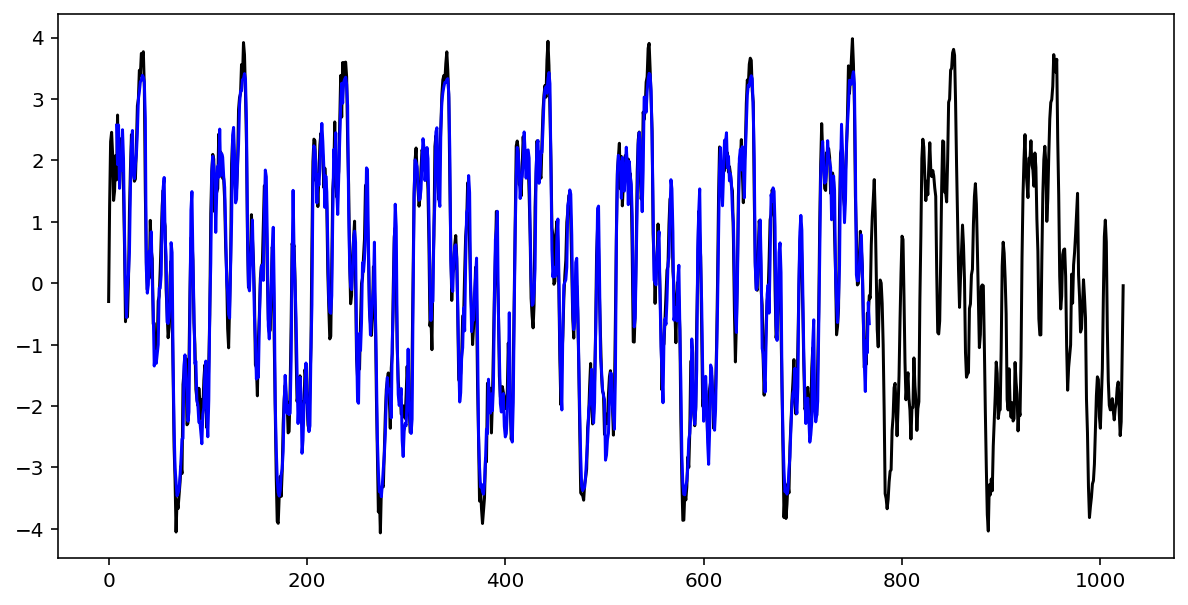

In [8]:
trainPredict = model.predict(xx) 
plt.figure(figsize = (10, 5)) 
plt.plot(F, 'k') 
plt.plot(np.r_[8:768],trainPredict, 'b') 
plt.show() 

In [9]:
data_gen = TimeseriesGenerator(F_test, F_test, length=8, sampling_rate=1, batch_size=768) 
batch_0 = data_gen[0] 
x, y = batch_0 
xx=np.reshape(x, (x.shape[0], 1, x.shape[1])) 
yy = y 
print(xx.shape)   
print(yy.shape)   

(256, 1, 8)
(256,)


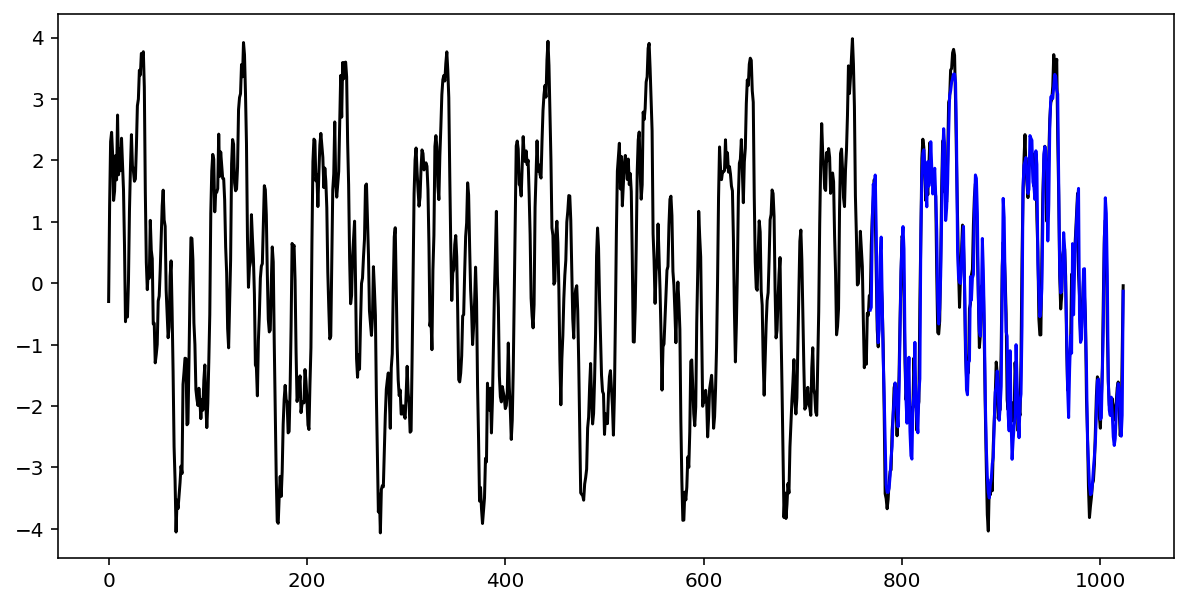

In [10]:
testPredict = model.predict(xx) 
plt.figure(figsize = (10, 5)) 
plt.plot(F, 'k') 
plt.plot(np.r_[768:1024],testPredict, 'b') 
plt.show() 